In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
random_state = 0 

doc_set = """
kawal yuk teman2 medical beau
update kasus covid-19 indonesia kamis 25 maret 2021 via
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
negative report mandatory for entering bengaluru from april 1
berita 41 kluster institusi didik direkod sejak 1 jan hingga khamis -
sops during self isolation khan sb
kalo mimpi ketemu toilet jangan coba masuk deh kalo udah lanjur masuk jangan coba nerusin seriu
akhbar pilih harga jatuh sindiket gelojoh baca lanjut pa
banyak 41 kluster libat institusi didik kes 1 jan 2021 hingga hari - kp kesihatan
update data kembang virus corona covid-19 25 maret 2021 satgascovid19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
travelling to bengaluru from punjab chandigarh negative covid-19 report must
instruksi bupati sleman baru guru tinggi selenggara kuliah tatap muka masa pandemi
pt angkasa pura i persero selenggara vaksinasi covid-19 hadap 856 covid19
hari banyak 16 juta bahan baku vaksin covid-19 merk coronavac buat sinovac biotech tiba indonesia
pemkot jogja tengah susun ulang atur kait giat ajar ajar kbm tatap muka covid19
hingga ini 25 dagang malioboro ikut vaksinasi covid-19 covid19
perempuan lebih mungkin alami efek samping terima vaksin covid-19 banding laki
lap kluster baharu kes hari masuk tujuh libat tempat kerja - kp kesihatan
covid-19 in karnataka rt-pcr negative certificates mandatory for people coming to bengaluru bsybjp
gaiter loops auaaq balaclava bandanas - coronavirus
anti ap ess par tu bht bol rhii ho yha tu phir be sb distance ma bhety ha or jo ap ki sister
the covid vaccine is here na imefika dimanga wakaazi wa dimanga wanashauku na chanjo hii kwa nini tune in to ou
lanjut ica hari mertua vaksinasi alami stroke kondisi rahang miring ki
rektor unp positif covid-19 vaksinasi intensif kampus air tawar
status kini task force operasi patuh pdrm baca lanjut paut
wabongo tulishangilia walivyopokea vaccine tukawachukulia kama bench mark wamepewa wanasiasa
ki ni mangwani yh py paisa lga k awam ko shifa dna ha aur
public speaking butuh sampai informasi cara efisien akurat efektif dengar mampu menangk
suntik 9 juta vaksin covid-19 wamenkes dampak lihat - beritasatu
pasien covid-19 rawat rsd wisma atlet mayor per 25 maret 2021 -
bansos covid-19 kpk panggil sekjen kemensos dirjen linjamsos - - nasional
tahun the media hotel and towers jadi posko tenaga medis covid-19 -
patut syukur indonesia cepat vaksin covid-19 - - nasional
catat angka mati hari tinggi akibat covid-19 - - pikir rakyat
budi bicara soal khawatir vaksinasi covid - cnbc indonesia
tangan covid-19 mungkin besar mudik lebaran larang - bisnis
covid-19 akibat senjang sosial perempuan makin nyata -
vaksin covid-19 tahap tujuh - beritasatu
klaim indonesia registrasi obat covid-19 buat 4 hari sembuh -
covid b117 duga masuk garut -
mutasi ganda covid-19 temu india - okezone
3 upaya ojk tangan dampak pandemik covid-19 -
aktor bollywood aamir khan positif covid-19 -
vaksinasi covid dagang pasar jemput paksa tenaga sehat polisi - inews
wna vaksinasi covid-19 sanur bal pakai vaksin astrazeneca - jawa pos
vaksinasi covid-19 tni al tahap akhir jakarta -
tim grup b piala menpora jalan vaksinasi covid-19 -
malioboro ingat jalan vaksinasi covid-19 -
wakil bupati mamuju telat vaksin covid-19 - -
modus tipu lowong kerja bayar tengah pandemi covid-19 - okezone
mark sungkar positif covid-19 - inews
cases zinapanda kuruka next week pia ni easter na ni kama kenyans wengi wanapanga sherehe mnaonaje tuk b
sedia layan vaksin covid-19 klinik pratama makmur jaya ciputat pamulang bintaro isi data pad
sma smk kalsel laksana uji sekolah masih masa pandemi covid-19 m
japan
kerala
kenya
segera daftar kuota 300 ribu prakerja
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
program imunisasi covid-19 bangsa tan sri dato haji muhyiddin bin haji muhammad yassin perdana menteri malay
innahhh da
lansia jangan takut vaksin warga bogor usia 104 tahun sehat pasca suntik vaksin
mantap 16 juta dosis vaksin covid sinovac tiba tanah air vaksin
umbono lingayekethisi icovid-19 isesekhona
umum panjang ppkm mikro sesuai instruksi gubernur diy no 8 instr 2021 ppkm mikro panjang m
panjang ppkm mikro brebes laku 5 april 2021 ppkm
seni hibur boleh laksana buah hajat giat sosial masyarakat adala
wakil presiden ma ruf amin imbau masyarakat jalan ibadah rumah lama ramadan langkah harus
italia vs irlandia utara tak gentar sama badai corona italy
laksana sambang pos sarlinmas pantai congot kulonprogo personel ditpolair polda diy ajak tugas untu
kapolda diy irjen pol drs asep suhendar hadir tanding pertama piala menpora
kamu malas hanya buang buang waktu kamu tak tahu bagaimana cara raih peluang bahkan pel
survei idm pepet pdip golkar kian moncer jelang milu 2024 fraksigolkar
ratus napi nusakambangan positif covid-19 isolasi lapas via
tahan lama pandemi bappenas dorong usaha laku digitalisasi bappenasri
vaksin covid-19 anak tunggu rekomendasi vaksin
sambang kawasan toko jl am sangaji jetis kota yogyakarta personel patroli polsek jetis polresta yogyakar
nu harap semua orang mau vaksin nahdlatululama
prokes 5m dagang unjung pasar bagi masker giat bagai upaya mendi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
naik 0 09 usd 1 182 gerak turun dorong tunda amp gelombang 3 m
us index naik 0 03 level 92 55 ini di level tinggi akibat optimisme ak
kan dah cakap kalau korang bukan vip
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap
katno had dukung sukses program vaksin covid-19
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap rang
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
dia kriteria pilih fasa-fasa program imunisasi bangsa anda patut tahu
top news koran rakyat merdeka vaksinasi covid juta hari mimpi jokowi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
vaksin astrazeneca selamat di malaysia
top news koran rakyat merdeka ragu terap protokol sehat jaga pemprov tolak buka 26 tempat karaoke
polri ayo cegah tular covid-19 jaga jarak a
top news koran rakyat merdeka bule langgar prokes bal dah langsung pulangin negara asal aja bal
top news koran rakyat merdeka soal sekolah tatap muka putus pekan depan satgascovid19
update data covid19 sulawesi barat tanggal 24 maret 2021 total sulbar positif 5358 sembuh 4980 tinggal 1
taat prokes keren jauh kerumun kurang mobilitas polresjogja




""".split("\n")[1:-1]


stopword = ['hari','juta', 'ayo', 'didik', 'yuk', 'jangan', 'toilet', 'kalo', 'mimpi', 'ketemu', 'coba', 'akhbar', 'pilih', 'banyak']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Tweet Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Tweet')
ax1.set_ylim(0, 60)


plt.show()

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -7.815494260195277 0.4474770105884579
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.9901   
1            1             4.0              0.9943   
2            2             0.0              0.9964   
3            3             3.0              0.9950   
4            4             1.0              0.9950   
5            5             2.0              0.9921   
6            6             2.0              0.9943   
7            7             3.0              0.9934   
8            8             4.0              0.9943   
9            9             4.0              0.9950   

                                            Keywords  \
0  covid, indonesia, top, merdeka, koran, news, r...   
1  covid, vaksinasi, ppkm, vaksin, panjang, mikro...   
2  covid, vaksin, polri, jaga, jarak, cegah, tula...   
3  jetis, fasa, rakyat, anda, tolak, sambang, rag...   
4  covid, indonesia, top, merdeka, koran, news, r...   
5  covid, pdrm, hadap, agong,

In [9]:
!python -m pip install -U pyLDAvis

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Requirement already up-to-date: pyLDAvis in c:\users\queensha\anaconda3\lib\site-packages (3.3.1)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Queensha\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=5e150667c0ef80c70d235453a6bcc9740bef1c1b6a4730a5f154f8b5982998ed
  Stored in directory: c:\users\queensha\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [10]:
!python -m pip install -U gensim

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Requirement already up-to-date: gensim in c:\users\queensha\anaconda3\lib\site-packages (4.0.1)


In [11]:
pip install --upgrade pip

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.Installing collected packages: pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [12]:
pip install --upgrade jupyter notebook

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Queensha\\anaconda3\\Lib\\site-packages\\~ornado\\speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [13]:
pip install pyLDAvis

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.2.3-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Queensha\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
random_state = 0 

doc_set = """
kawal yuk teman2 medical beau
update kasus covid-19 indonesia kamis 25 maret 2021 via
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
negative report mandatory for entering bengaluru from april 1
berita 41 kluster institusi didik direkod sejak 1 jan hingga khamis -
sops during self isolation khan sb
kalo mimpi ketemu toilet jangan coba masuk deh kalo udah lanjur masuk jangan coba nerusin seriu
akhbar pilih harga jatuh sindiket gelojoh baca lanjut pa
banyak 41 kluster libat institusi didik kes 1 jan 2021 hingga hari - kp kesihatan
update data kembang virus corona covid-19 25 maret 2021 satgascovid19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
travelling to bengaluru from punjab chandigarh negative covid-19 report must
instruksi bupati sleman baru guru tinggi selenggara kuliah tatap muka masa pandemi
pt angkasa pura i persero selenggara vaksinasi covid-19 hadap 856 covid19
hari banyak 16 juta bahan baku vaksin covid-19 merk coronavac buat sinovac biotech tiba indonesia
pemkot jogja tengah susun ulang atur kait giat ajar ajar kbm tatap muka covid19
hingga ini 25 dagang malioboro ikut vaksinasi covid-19 covid19
perempuan lebih mungkin alami efek samping terima vaksin covid-19 banding laki
lap kluster baharu kes hari masuk tujuh libat tempat kerja - kp kesihatan
covid-19 in karnataka rt-pcr negative certificates mandatory for people coming to bengaluru bsybjp
gaiter loops auaaq balaclava bandanas - coronavirus
anti ap ess par tu bht bol rhii ho yha tu phir be sb distance ma bhety ha or jo ap ki sister
the covid vaccine is here na imefika dimanga wakaazi wa dimanga wanashauku na chanjo hii kwa nini tune in to ou
lanjut ica hari mertua vaksinasi alami stroke kondisi rahang miring ki
rektor unp positif covid-19 vaksinasi intensif kampus air tawar
status kini task force operasi patuh pdrm baca lanjut paut
wabongo tulishangilia walivyopokea vaccine tukawachukulia kama bench mark wamepewa wanasiasa
ki ni mangwani yh py paisa lga k awam ko shifa dna ha aur
public speaking butuh sampai informasi cara efisien akurat efektif dengar mampu menangk
suntik 9 juta vaksin covid-19 wamenkes dampak lihat - beritasatu
pasien covid-19 rawat rsd wisma atlet mayor per 25 maret 2021 -
bansos covid-19 kpk panggil sekjen kemensos dirjen linjamsos - - nasional
tahun the media hotel and towers jadi posko tenaga medis covid-19 -
patut syukur indonesia cepat vaksin covid-19 - - nasional
catat angka mati hari tinggi akibat covid-19 - - pikir rakyat
budi bicara soal khawatir vaksinasi covid - cnbc indonesia
tangan covid-19 mungkin besar mudik lebaran larang - bisnis
covid-19 akibat senjang sosial perempuan makin nyata -
vaksin covid-19 tahap tujuh - beritasatu
klaim indonesia registrasi obat covid-19 buat 4 hari sembuh -
covid b117 duga masuk garut -
mutasi ganda covid-19 temu india - okezone
3 upaya ojk tangan dampak pandemik covid-19 -
aktor bollywood aamir khan positif covid-19 -
vaksinasi covid dagang pasar jemput paksa tenaga sehat polisi - inews
wna vaksinasi covid-19 sanur bal pakai vaksin astrazeneca - jawa pos
vaksinasi covid-19 tni al tahap akhir jakarta -
tim grup b piala menpora jalan vaksinasi covid-19 -
malioboro ingat jalan vaksinasi covid-19 -
wakil bupati mamuju telat vaksin covid-19 - -
modus tipu lowong kerja bayar tengah pandemi covid-19 - okezone
mark sungkar positif covid-19 - inews
cases zinapanda kuruka next week pia ni easter na ni kama kenyans wengi wanapanga sherehe mnaonaje tuk b
sedia layan vaksin covid-19 klinik pratama makmur jaya ciputat pamulang bintaro isi data pad
sma smk kalsel laksana uji sekolah masih masa pandemi covid-19 m
japan
kerala
kenya
segera daftar kuota 300 ribu prakerja
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
program imunisasi covid-19 bangsa tan sri dato haji muhyiddin bin haji muhammad yassin perdana menteri malay
innahhh da
lansia jangan takut vaksin warga bogor usia 104 tahun sehat pasca suntik vaksin
mantap 16 juta dosis vaksin covid sinovac tiba tanah air vaksin
umbono lingayekethisi icovid-19 isesekhona
umum panjang ppkm mikro sesuai instruksi gubernur diy no 8 instr 2021 ppkm mikro panjang m
panjang ppkm mikro brebes laku 5 april 2021 ppkm
seni hibur boleh laksana buah hajat giat sosial masyarakat adala
wakil presiden ma ruf amin imbau masyarakat jalan ibadah rumah lama ramadan langkah harus
italia vs irlandia utara tak gentar sama badai corona italy
laksana sambang pos sarlinmas pantai congot kulonprogo personel ditpolair polda diy ajak tugas untu
kapolda diy irjen pol drs asep suhendar hadir tanding pertama piala menpora
kamu malas hanya buang buang waktu kamu tak tahu bagaimana cara raih peluang bahkan pel
survei idm pepet pdip golkar kian moncer jelang milu 2024 fraksigolkar
ratus napi nusakambangan positif covid-19 isolasi lapas via
tahan lama pandemi bappenas dorong usaha laku digitalisasi bappenasri
vaksin covid-19 anak tunggu rekomendasi vaksin
sambang kawasan toko jl am sangaji jetis kota yogyakarta personel patroli polsek jetis polresta yogyakar
nu harap semua orang mau vaksin nahdlatululama
prokes 5m dagang unjung pasar bagi masker giat bagai upaya mendi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
naik 0 09 usd 1 182 gerak turun dorong tunda amp gelombang 3 m
us index naik 0 03 level 92 55 ini di level tinggi akibat optimisme ak
kan dah cakap kalau korang bukan vip
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap
katno had dukung sukses program vaksin covid-19
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap rang
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
dia kriteria pilih fasa-fasa program imunisasi bangsa anda patut tahu
top news koran rakyat merdeka vaksinasi covid juta hari mimpi jokowi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
vaksin astrazeneca selamat di malaysia
top news koran rakyat merdeka ragu terap protokol sehat jaga pemprov tolak buka 26 tempat karaoke
polri ayo cegah tular covid-19 jaga jarak a
top news koran rakyat merdeka bule langgar prokes bal dah langsung pulangin negara asal aja bal
top news koran rakyat merdeka soal sekolah tatap muka putus pekan depan satgascovid19
update data covid19 sulawesi barat tanggal 24 maret 2021 total sulbar positif 5358 sembuh 4980 tinggal 1
taat prokes keren jauh kerumun kurang mobilitas polresjogja




""".split("\n")[1:-1]


stopword = ['hari','juta', 'ayo', 'didik', 'yuk', 'jangan', 'toilet', 'kalo', 'mimpi', 'ketemu', 'coba', 'akhbar', 'pilih', 'banyak']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(3, 4):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    domin

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3 -7.965191888989379 0.49069494825243104
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.9950   
1            1             1.0              0.9972   
2            2             0.0              0.9982   
3            3             1.0              0.9975   
4            4             2.0              0.9975   
5            5             2.0              0.9960   
6            6             2.0              0.9972   
7            7             2.0              0.9967   
8            8             2.0              0.9972   
9            9             0.0              0.6639   

                                            Keywords  \
0  covid, vaksinasi, masuk, vaksin, hadap, kluste...   
1  covid, vaksin, ppkm, vaksinasi, pandemi, mikro...   
2  covid, polri, tular, jaga, jarak, cegah, virus...   
3  covid, vaksin, ppkm, vaksinasi, pandemi, mikro...   
4  covid, vaksinasi, masuk, vaksin, hadap, kluste...   
5  covid, vaksinasi, masuk, 

In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

C:\Users\Queensha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Queensha\anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable
C:\Users\Queensha\anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping
C:\Users\Queensha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarn

In [2]:
random_state = 0 

doc_set = """
kawal yuk teman2 medical beau
update kasus covid-19 indonesia kamis 25 maret 2021 via
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
negative report mandatory for entering bengaluru from april 1
berita 41 kluster institusi didik direkod sejak 1 jan hingga khamis -
sops during self isolation khan sb
kalo mimpi ketemu toilet jangan coba masuk deh kalo udah lanjur masuk jangan coba nerusin seriu
akhbar pilih harga jatuh sindiket gelojoh baca lanjut pa
banyak 41 kluster libat institusi didik kes 1 jan 2021 hingga hari - kp kesihatan
update data kembang virus corona covid-19 25 maret 2021 satgascovid19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
travelling to bengaluru from punjab chandigarh negative covid-19 report must
instruksi bupati sleman baru guru tinggi selenggara kuliah tatap muka masa pandemi
pt angkasa pura i persero selenggara vaksinasi covid-19 hadap 856 covid19
hari banyak 16 juta bahan baku vaksin covid-19 merk coronavac buat sinovac biotech tiba indonesia
pemkot jogja tengah susun ulang atur kait giat ajar ajar kbm tatap muka covid19
hingga ini 25 dagang malioboro ikut vaksinasi covid-19 covid19
perempuan lebih mungkin alami efek samping terima vaksin covid-19 banding laki
lap kluster baharu kes hari masuk tujuh libat tempat kerja - kp kesihatan
covid-19 in karnataka rt-pcr negative certificates mandatory for people coming to bengaluru bsybjp
gaiter loops auaaq balaclava bandanas - coronavirus
anti ap ess par tu bht bol rhii ho yha tu phir be sb distance ma bhety ha or jo ap ki sister
the covid vaccine is here na imefika dimanga wakaazi wa dimanga wanashauku na chanjo hii kwa nini tune in to ou
lanjut ica hari mertua vaksinasi alami stroke kondisi rahang miring ki
rektor unp positif covid-19 vaksinasi intensif kampus air tawar
status kini task force operasi patuh pdrm baca lanjut paut
wabongo tulishangilia walivyopokea vaccine tukawachukulia kama bench mark wamepewa wanasiasa
ki ni mangwani yh py paisa lga k awam ko shifa dna ha aur
public speaking butuh sampai informasi cara efisien akurat efektif dengar mampu menangk
suntik 9 juta vaksin covid-19 wamenkes dampak lihat - beritasatu
pasien covid-19 rawat rsd wisma atlet mayor per 25 maret 2021 -
bansos covid-19 kpk panggil sekjen kemensos dirjen linjamsos - - nasional
tahun the media hotel and towers jadi posko tenaga medis covid-19 -
patut syukur indonesia cepat vaksin covid-19 - - nasional
catat angka mati hari tinggi akibat covid-19 - - pikir rakyat
budi bicara soal khawatir vaksinasi covid - cnbc indonesia
tangan covid-19 mungkin besar mudik lebaran larang - bisnis
covid-19 akibat senjang sosial perempuan makin nyata -
vaksin covid-19 tahap tujuh - beritasatu
klaim indonesia registrasi obat covid-19 buat 4 hari sembuh -
covid b117 duga masuk garut -
mutasi ganda covid-19 temu india - okezone
3 upaya ojk tangan dampak pandemik covid-19 -
aktor bollywood aamir khan positif covid-19 -
vaksinasi covid dagang pasar jemput paksa tenaga sehat polisi - inews
wna vaksinasi covid-19 sanur bal pakai vaksin astrazeneca - jawa pos
vaksinasi covid-19 tni al tahap akhir jakarta -
tim grup b piala menpora jalan vaksinasi covid-19 -
malioboro ingat jalan vaksinasi covid-19 -
wakil bupati mamuju telat vaksin covid-19 - -
modus tipu lowong kerja bayar tengah pandemi covid-19 - okezone
mark sungkar positif covid-19 - inews
cases zinapanda kuruka next week pia ni easter na ni kama kenyans wengi wanapanga sherehe mnaonaje tuk b
sedia layan vaksin covid-19 klinik pratama makmur jaya ciputat pamulang bintaro isi data pad
sma smk kalsel laksana uji sekolah masih masa pandemi covid-19 m
japan
kerala
kenya
segera daftar kuota 300 ribu prakerja
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
program imunisasi covid-19 bangsa tan sri dato haji muhyiddin bin haji muhammad yassin perdana menteri malay
innahhh da
lansia jangan takut vaksin warga bogor usia 104 tahun sehat pasca suntik vaksin
mantap 16 juta dosis vaksin covid sinovac tiba tanah air vaksin
umbono lingayekethisi icovid-19 isesekhona
umum panjang ppkm mikro sesuai instruksi gubernur diy no 8 instr 2021 ppkm mikro panjang m
panjang ppkm mikro brebes laku 5 april 2021 ppkm
seni hibur boleh laksana buah hajat giat sosial masyarakat adala
wakil presiden ma ruf amin imbau masyarakat jalan ibadah rumah lama ramadan langkah harus
italia vs irlandia utara tak gentar sama badai corona italy
laksana sambang pos sarlinmas pantai congot kulonprogo personel ditpolair polda diy ajak tugas untu
kapolda diy irjen pol drs asep suhendar hadir tanding pertama piala menpora
kamu malas hanya buang buang waktu kamu tak tahu bagaimana cara raih peluang bahkan pel
survei idm pepet pdip golkar kian moncer jelang milu 2024 fraksigolkar
ratus napi nusakambangan positif covid-19 isolasi lapas via
tahan lama pandemi bappenas dorong usaha laku digitalisasi bappenasri
vaksin covid-19 anak tunggu rekomendasi vaksin
sambang kawasan toko jl am sangaji jetis kota yogyakarta personel patroli polsek jetis polresta yogyakar
nu harap semua orang mau vaksin nahdlatululama
prokes 5m dagang unjung pasar bagi masker giat bagai upaya mendi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
naik 0 09 usd 1 182 gerak turun dorong tunda amp gelombang 3 m
us index naik 0 03 level 92 55 ini di level tinggi akibat optimisme ak
kan dah cakap kalau korang bukan vip
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap
katno had dukung sukses program vaksin covid-19
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap rang
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
dia kriteria pilih fasa-fasa program imunisasi bangsa anda patut tahu
top news koran rakyat merdeka vaksinasi covid juta hari mimpi jokowi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
vaksin astrazeneca selamat di malaysia
top news koran rakyat merdeka ragu terap protokol sehat jaga pemprov tolak buka 26 tempat karaoke
polri ayo cegah tular covid-19 jaga jarak a
top news koran rakyat merdeka bule langgar prokes bal dah langsung pulangin negara asal aja bal
top news koran rakyat merdeka soal sekolah tatap muka putus pekan depan satgascovid19
update data covid19 sulawesi barat tanggal 24 maret 2021 total sulbar positif 5358 sembuh 4980 tinggal 1
taat prokes keren jauh kerumun kurang mobilitas polresjogja




""".split("\n")[1:-1]


stopword = ['hari','juta', 'ayo', 'didik', 'yuk', 'jangan', 'toilet', 'kalo', 'mimpi', 'ketemu', 'coba', 'akhbar', 'pilih', 'banyak']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    domin

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -7.840747594955171 0.45171772699516016
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.9901   
1            1             3.0              0.9943   
2            2             1.0              0.9964   
3            3             4.0              0.9950   
4            4             3.0              0.9950   
5            5             2.0              0.9921   
6            6             0.0              0.9943   
7            7             0.0              0.9934   
8            8             2.0              0.9943   
9            9             2.0              0.9950   

                                            Keywords  \
0  covid, vaksin, vaksinasi, indonesia, selenggar...   
1  covid, vaksin, vaksinasi, indonesia, selenggar...   
2  covid, cegah, jaga, tular, polri, jarak, virus...   
3  covid, vaksin, vaksinasi, ppkm, april, masuk, ...   
4  covid, vaksin, vaksinasi, indonesia, selenggar...   
5  covid, vaksin, tugas, rak

In [3]:
# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Tweet Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Tweet')
ax1.set_ylim(0, 60)


plt.show()

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'ax1' is not defined

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -8.24669766180071 0.5682302946360199
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.9997   
1            1             0.0              0.9998   
2            2             3.0              0.9994   
3            3             2.0              0.9997   
4            4             4.0              0.8883   
5            5             1.0              0.9997   
6            6             0.0              0.9998   
7            7             1.0              0.9993   
8            8             4.0              0.9967   
9            9             3.0              0.9990   

                                            Keywords  \
0  yang, covid, dan, ini, mutasi, covidindonesia,...   
1  dan, yang, lebih, covidindonesia, untuk, mysaf...   
2  yang, covid, dan, ini, mutasi, covidindonesia,...   
3  the, covidindonesia, yang, dan, masker, and, c...   
4  yang, dari, dan, covid, ini, covidindonesia, p...   
5  vaksã, covidindonesia, covi

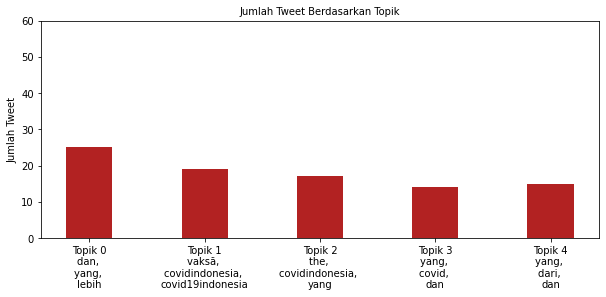

In [5]:
random_state = 0 

doc_set = """
Gubernur DKI Jakarta Anies Baswedan kembali menerapkan pelaksanaan Pembatasan Sosial Berskala Besar atau PSBB Jakarta. "Kita terpaksa kembali menerapkan Pembatasan Sosial Berskala Besar seperti pada masa awal pandemi dulu. Bukan lagi masa transisi, tapi PSBB awal dulu," ucap Anies (9/9).Pelaksanaan rem darurat, menurut Anies demi menyelamatkan masyarakat Jakarta karena tengah terjadi tren kenaikan kasus Covid-19 di Jakarta. Dia mengatakan saat ini ketersediaan tempat tidur isolasi sebanyak 4.800-an bisa penuh jika kondisi tidak berubah. "Kami sampaikan malam ini sebagai ancang-ancang, mulai Senin 14 September kegiatan perkantoran yang non-esensial diharuskan melaksanakan kegiatan bekerja dari rumah," kata Anies menjelaskan.Sementara itu, jumlah pasien positif Covid-19 di Jakarta bertambah 1.026 kasus pada Rabu 9 September 2020. Dengan penambahan tersebut jumlah akumulatif pasien positif Covid-19 sebanyak 49.837 orang.30w
Dikutip brilio.net dari liputan6.com, Pusat Pengelolaan Komplek Gelora Bung Karno (PPKGBK) mulai memperketat aturan bagi masyarakat yang ingin berkunjung ke kawasan tersebut, salah satunya dengan melarang ibu hamil dan anak-anak masuk kawasan kompleks GBK.Direktur Utama PPKGBK Winarto mengatakan, kebijakan tersebut diambil setelah pengelola menemukan masih banyak pengunjung, terutama di ring road SUGBK yang tidak melakukan protokol kesehatan. "Dalam pengamatan kami, yang datang ini tidak bermaksud olahraga, tapi piknik. Mereka banyak yang membawa anak, bayi, dan kereta dorong. Mungkin hanya sekitar 40 persen yang betul-betul berolahraga," kata Winarto (18/6). Keputusan melarang ibu hamil, bayi, dan anak-anak juga tak serta merta diambil begitu saja. Menurut Winarto, kebijakan tersebut merupakan rekomendasi dari Ikatan Dokter Anak Indonesia.Selain melarang ibu hamil dan anak-anak di bawah usia 12 tahun, pengelola juga telah menetapkan kebijakan baru agar masyarakat bisa tetap aman dan nyaman dengan kebijakan jam operasional dimulai pada pukul 05.00-20.00 WIB, akses masuk ke kawasan GBK melalui Pintu 5 dan Pintu 10, dan area Ring Road Stadion Utama GBK hanya untuk pejalan kaki.Jangan lupa cek terus ya di www.brilio.net untuk hal-hal menarik, unik, langka dan info terupdate lainnya.42w
Presiden AS Donald Trump mengatakan dia dan ibu negara Melania Trump dinyatakan positif Covid-19.Dalam sebuah unggahan di Twitter pada Jumat (2/10), ia menyampaikan informasi tersebut. â€œKami akan segera memulai proses karantina dan pemulihan kami. Kami akan melewati ini bersama!â€ tulis Trump.Sebelumnya, salah satu penasihat Presiden AS Donald Trump, Hope Hicks, dinyatakan positif terpapar Covid-19. Penasihat presiden itu sempat melakukan perjalanan bersama Trump dengan Air Force One ke debat presiden AS di Ohio pada Selasa kemarin.27w
Pemprov DKI Jakarta memutuskan mengurangi kebijakan rem darurat dan kembali menerapkan Pembatasan Sosial Berskala Besar (PSBB) Transisi, mulai 12-25 Oktober 2020. Dengan pelonggaran itu, maka beberapa aktivitas Indoor boleh kembali diperbolehkan beroperasi, salah satunya bioskop. "Dengan pengaturan tempat duduk secara ketat," kata Anies dalam keterangan tertulis, Minggu (11/10/2020).Aktivitas indoor yang dimaksud adalah bioskop, meeting, workshop, seminar, teater, akad nikah, pemberkatan, upacara pernikahan. Namun, kegiatan tersebut baru dapat dibuka saat PSBB Transisi dengan syarat harus melalui pengajuan persetujuan teknis oleh pengelola gedung kepada Pemprov DKI.Selain itu, terdapat enam syarat lainnya untuk dapat izin operasi saat PSBB Transisi, yakni:- Maksimal 25% kapasitas.- Jarak antar tempat duduk minimal 1,5 meter- Peserta dilarang berpindah-pindah tempat duduk, atau berlalu- lalang (melantai)- Alat makan-minum disterilisasi- Pelayanan makanan dilarang dalam bentuk prasmanan- Petugas memakai masker, face shield, dan sarung tangan.25w
Dilansir dari health.detik.com, saat seseorang terinfeksi virus Corona, berbagai gejala biasanya muncul seperti demam, batuk hingga diare. Bahkan sebagian lainnya ada juga yang tidak mengalami gejala apapun atau disebut dengan orang tanpa gejala (OTG).â£â£Namun dari beberapa gejala yang ada, kehilangan indra penciuman atau anosmia menjadi salah satu yang paling khas. Meskipun sering dialami saat seseorang flu, hal ini akan jauh lebih parah pada pasien COVID-19.â£â£Apa itu anosmia?â£â£Anosmia adalah kehilangan kemampuan indra penciuman yang biasanya dialami oleh seseorang yang sedang flu karena hidung tersumbat. Tetapi, belakangan kondisi ini sering sekali dialami para pasien COVID-19, diikuti dengan hilangnya kemampuan indra perasanya.â£â£Bagaimana kondisi itu bisa terjadi?â£â£Menurut penelitian, penyebab kehilangan penciuman ini bisa terjadi pada pasien COVID-19 karena adanya protein di permukaan beberapa sel manusia, yang bisa dengan mudah 'mengikat' virus Corona.â£â£"Ini adalah sel-sel yang ditemukan di jantung, paru-paru, usus, tenggorokan, dan hidung," tulis peneliti yang dikutip dari Science Focus, Senin (21/9/2020).â£â£Sampai kapan gejala itu akan terjadi?â£â£Berdasarkan studi lanjutan yang dilakukan, para ilmuwan pun mengamati pasien yang pulih dari COVID-19. Mereka menemukan bahwa neuron sensorik ini perlahan mulai kembali dari waktu ke waktu, tetapi efek jangka panjang gejala ini masih belum diketahui.â£â£"Beberapa pasien COVID-19 melaporkan setelah kemampuan indra penciuman mereka kembali, mereka mencium bau yang menyimpang (parosmia) dan bertahan selama berbulan-bulan," ujar Dr Lane.â£â£"Gangguan bau jangka panjang COVID-19 ini tidak biasa, sehingga perlu dilakukan studi lebih lanjut," imbuhnya.â£â£#mitrakorpora #mysafe #mysafeapp #beritaterkini #updatecovid19 #updatecovid #viral #updatecovid19indonesia #updatekorona #beritaindonesia #beritaviruscorona #covidindonesia #covidindo #beritacovid19 #viralindonesia #beritacovid #updatecovid #pakaimasker #beritaviral #beritaviralhariini #beritaviral_hits #covid19 #beritakorona #lawancovid19 #beritaterbaru #viralbanget22w
[MYOSIN WEBINAR SERIES PART 3]Yang ditunggu telah tiba!!â€¢Hoax? Bagaimana jadi pribadi yang lebih bijak terhadap info ya?Bingung cara membuat konten kreatif dan inovatif disaat krisis?â€¢Dengan bangga, Achilles mempersembahkan..â€¢MYOSIN WEBINAR SERIES PART 3â€¢ðŸ—“ï¸ Minggu, 13 September 2020ðŸ•› pukul 13.00-15.00 WIBðŸ“³ Live via zoom dan youtube di kanal Baksos FK UNAIR MYOSIN 2020ðŸŽŸï¸ FREE registðŸŽ E-SERTIFâ€¢Narasumber :â€¢ dr. Ricky Indra Alfarai (Health and Academic Influencer, PhD student in Japan)â€¢ Gita Savitri Devi, B. Sc ( Creators of Change Ambassador)Moderator:â€¢ Arya Satya Rajanegara, S. Ked (Founder Meniscus, Sekretaris Wilayah 4 ISMKI 2019/2020)MC:â€¢Alfira Nailatul Izzah (Duta Favorit FK Unair 2018)Jadi, jangan lewatkan kesempatan mendapatkan Ilmu!Segera daftarkan dirimu,dan ajak orang-orang terdekat mu!â€¢Di link>> bit.ly/WebinarMYOSIN2020Link di bioâ€¢" Sedikit kebaikan yang kita berikan, bisa sangat berarti bagi mereka yang membutuhkan"Myosin 2020â€¢#BaksosFKUNAIR #MYOSIN2020#FKUNAIR#MulaiBerbuat #Maribermanfaat #mulaiajadulu #Pejuangmanfaat#WEBINAR #webinargratis #webinarseries #webinarkesehatan #covid19 #covid_19 #covidindonesia #covidjatim #newnormal #newnormal2020 #kebiasaanbaru #kebiasaanbaru2020 #produktif #millenial #seminar_um29w
Dilansir dari pandemictalks, momen pengetukan palu akan RUU Cipta Kerja atau #omnibuslaw saat pandemi berlangsung telah memantik keramaian-keramaian demontrasi oleh beberapa buruh dan rakyat di beberapa daerah. Sebuah keputusan yang tidak tepat momentumnya, karena menimbulkan reaksi buruk bagi pandemi, yaituâ£â£â£â£1. Keramaian dalam jarak dekatâ£, kemungkinan ada beberapa orang tidak menggunakan masker.â£2. Durasi keramaian lamaâ£.â£3. Droplets/aerosol yang berterbaran saat orasiâ£. Orang berteriak mengeluarkan banyak Droplets.â£4. Dan paling bahaya adalah tiada TESTING dan TRACING saat/sesudah demonstrasi berlangsung.â£â£â£â£Karena dikhawatirkan akan muncul klaster besar demo, lalu bermigrasi ke klaster keluarga juga klaster kantor/pabrik. Super-Spreader event juga dikhawatirkan terjadi.â£â£Untuk itu, demi mencegah penyebaran virus korona saat demonstrasi tetap disiplin menerapkan protokol kesehatan ya safe people!â£â£â£Berikut ini adalah cara demostrasi yang aman dan sehat saat pandemiâ£â£1. Gunakan maskerâ£2. Gunakan pelindung mata/kacamata untuk mengurangi transmisi virus melalui mata.â£3. Jaga jarak minimum 2 meter dengan peserta demo lainnyaâ£4. Usahan jangan berada di posisi tengah barisan demonstrasi, namun di ujung luar garis deminstrasi. Selain itu, perhatikan arah angin untuk minimalisir penyebaran aerosol.â£â£â£#mitrakorpora #mysafe #mysafeapp #beritaterkini #updatecovid19 #updatecovid #viral #updatecovid19indonesia #updatekorona #beritaindonesia #beritaviruscorona #covidindonesia #covidindo #beritacovid19 #viralindonesia #beritacovid #updatecovid #pakaimasker #beritaviral #beritaviralhariini #beritaviral_hits #covid19 #beritakorona #lawancovid19 #beritaterbaru #viralbanget23w
Najwa mewawancarai kursi kosong?Acara mata najwa kini menjadi sorotan dikarenakan suatu momen ketika najwa mewawancari kursi yang tidak ada orang padahal memang sebelumnya dia mengundang mentri kesehatan namun tidak hadir dan dia tetap melajutkan acara dengan mewawancari kursi kosong wow. Menurut kalian gimana?...Credit tertera di video ðŸ˜ŠSource: Tiktok..Jangan lupa follow Vidteutic ya gaes ðŸ˜Š@vidteutic@vidteutic@vidteutic..#najwashihab #terawan #covid #covidindonesia27w
Ternyata Poto saya dari kecil sudah pakai maskerðŸ˜·ðŸ˜€ðŸ˜Ž.#protokolkesehatan#memakaimasker#covidindonesia#covid19indonesia30w
"Dunia ini ibarat bayangan,kalau kamu berusaha menangkapnya,ia akan lari.Tapi kalau kamu membelakanginya,ia tak punya pilihan selain mengikutimu."- Ibnu Qayyim Al Jauziyyah -#indonesiatangguh #indonesiasehatdarirumah #indonesiajuara #sehatnegeriku #semangat #semangatindonesia #semangatpagiðŸ’ª #katakatabijak #islamicquotes #nasehat #nasehatislam #covidindonesia #lawancovid19 #quotereligi #quotesoftheday #pesan #pesanibu #ingatpesanibu #moslemquotes25w
MYOSIN WEBINAR SERIES #3â€¢Telah terlaksana webinar terakhir dari MYOSIN Webinar Series dengan tema "Cerdas dan Kreatif dalam Bersosial Media di Era Milenial". Terima kasih kepada narasumber dan seluruh peserta. Semoga webinar yang diberikan dapat menginspirasi kita semua dan bermanfaat untuk mendukung aktivitas kita di era milenial ini.â€¢"Sedikit yang kita berikan, bisa sangat berarti bagi mereka yang membutuhkan" -Myosin 2020-#BaksosFKUNAIR #MYOSIN2020 #FKUNAIR #MulaiBerbuat #MariBermanfaat #mulaiajadulu #Pejuangmanfaat #WEBINAR #webinargratis #webinarseries #webinarkesehatan #covid19 #COVID-19 #covidindonesia #covidjatim #newnormal #newnormal_2020 #belajar #hoax #creative #content29w
Hey everyone, Christmas is coming! ðŸŽ„ðŸŽ…As you make your holiday plans, remember that the best gift ðŸŽðŸŽ‰ you can give is stay home and stay safe!Stronger than ever ðŸ’ªðŸ» Yes.. i was tested positive for #covid19 and believe me, itâ€™s only time that positive sounded so negative.Iâ€™m still recovery each day, trying to be stronger physically, mentally, and emotionally.Thanks to my lovely husband, entire family who stood by my side and all friends who supported in every possible way â¤ï¸â¤ï¸â¤ï¸ITâ€™S ONLY BY HIS GRACE, iâ€™m getting my energy back slowly. Thank you for all the love, pray, and support you guys have given me so far.Badai pasti berlalu~~~#covidsurvivor #covidindonesia16w
Ini kenyataan yang sulit diterima tapi juga tak bisa diabaikan#Covid #covidindonesia #covid_19 #Jepara #JeparaKita39w
Kulik santai minggu besok kita mengimport dokter Psikiatri yg beken yaitu @algristianhafid ! Kita akan bahas lebih dalam infodemics (jutaan infoo yang seliweran saat ini) benernya madu atau racun sih? Kita akan bahas kenapa informasi (bisa bener atau bohong) itu madu untuk raga kita atau ternyata racun! Syedappp..Jangan lupa minggu besok yaaa! Jam nya tetep dong jam 20.00#kuliksantai #livetalk #infodemic #infokesehatan #infosehat #psikiatri #instagramlivestream #dokterpedia #covidindonesia28w
produk gabungan antara buku dan boneka yang dikemas apik dengan penambahan fitur audio. Konsep buku boneka pertama di Indonesia yang cocok menemani aktivitas buah hati dimanapun berada.Hubungi Book Advisor kesayangan Ayah Bunda sekarang juga,hubungi Bunda Dea WA 085708850299 atau klik link di bio untuk info selengkapnya ya! ðŸ˜‰â£â£â£â£ðŸ˜ŠðŸ’•â£â£â£â£â£â£â£â€”#momliteracyexpo2020â£â£#mizanmle2020â£â£#mandiramle2020â£â£#mbcmle2020#mizanstore2020#gabungduluaja #bukuanakmataram #bukuanakjawa #covid19italia #covidindonesia #covid19 #motherhood29w
Selalu taati protokol kesehatan dan lakukan 3M yaitu Memakai Masker, Mencuci Tangan dan Menjaga Jarak. Lindungi selalu keluarga â¤#coviÌ‡d19 #covid19indonesia #covidlife #covidindonesia #cegahcovid19 #cegahcovid #cegahcovid19bersama #cegahcorona #cegahcoronabersama #mencucitanganpakaisabun #mencucitangan #menjagajarak #pakaimaskeryuk #pakaimaskerselalu #pakaimasker #pakaimaskerlebihaman #pakaimaskeruntuksemua #pakaimaskerutksemua #maskerkain #maskerterbaik #lindungikeluargaanda #lindungikeluarga #tipskeluarga #tipskeluargasehat #tipssehatalami #tipssehat #tipssehatkeluarga27w
Kasus covid-19 klaster keluarga sempat merebak nih beberapa waktu terakhir.. TemanKita, hindari penyebarannya dengan tips di atas ini yuk ðŸ‘†ðŸ»-Jangan lupa simpan dan bagikan ke teman-teman yang lainnya juga ya! Stay safe, TemanKita ðŸ¥°27w
Apa aja sih yg kalian lakuin dirumah selama pandemi? ðŸ¤”.Admin yg pasti ngegame dong wkwk, Semoga pandemi ini cepat berakhir. tag teman kamu..âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âœ”FOLLOW FOR MORE MEME & INFO:@infogamer.id@infogamer.id@infogamer.idâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–[BONUS TAG]#covidindonesia #gamerforlife#indogamers âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–37w
Cara menggunakan masker harus benar agar lebih efektif dalam pencegahan penyebaran virus ðŸ¦ .#idntimes #covid_19 #corona #protokolkesehatan #protokolkesehatancovid19 #coronaindonesia #coronajakarta #covidindonesia26w
My normal Sunday.. What about yours?#dokteranakmedan #rsiastellamaris#rsiastellamarismedan #dokteranak #pediatrician #siagacovid19 #covid19 #covid19indonesia #covidindonesia #stopcovid19 #pandemic2020 #proimunisasi #imunisasi #indonesiasehat #anakindonesia #balitasehat #bayisehat #bayisehatindonesia #anakmedan #newnormal #newnormalindonesia #newnormalmedan #bersamalawancorona #newnormal202039w
Vaksinasi termasuk dalam imunisasi khusus yang dimuat dalam Peraturan Menteri Kesehatan Nomor 12 Tahun 2017 tentang Penyelenggaraan Imunisasi, Vaksinasi dilakukan dengan tujuan untuk tercapainya herd immunity atau kekebalan masyarakat di suatu negara terhadap suatu penyakit tertentu.Jika hal itu tidak tercapai, maka dikuatirkan jumlah korban meninggal terus akan bertambah, pemulihan kesehatan masyarakat akan memakan waktu lebih lama dan tentu biaya yg dikeluarkan pun akan semakin besar. Kita semua pastinya berharap strategi yg diterapkan @kemenkes_ri @satgascovid19.id utk menyelenggarakan vaksinasi bisa direncanakan secara matang dan baik agar tercapai target tujuannya.Jadi gimana menurut boss2kuh Layakkah bila rakyat hrs bayar utk mendapatkan vaksin ini?Silakan tulis jawaban dan alasanmu di kolom komen ya :)Thanks..ðŸ™ðŸ»Tetap jaga protokol kesehatan danStay safe and healthy semua ya ðŸ˜Š ðŸ™ðŸ½#vaksincovid19 #herdimmunity #vaccinecovid19 #sinovac #pandemicovid19 #vaksin#indonesialawancorona #antibodi #covid19indonesia #vaksincorona#mentrikesehatan #indonesiabangkit #protokolkesehatan #cucitangan #stopcovid19 #menkes #faktakesehatan #covidindonesia #updatecovid19 #beritacorona #indonesialawancovid19 #coronamasihada16w
Good Morning Ayah Bunda ðŸ¤—ðŸ˜ â£â£Salah satu board book dalam Healthy Kids berjudul Achoo terdapat fitur slide dan push pull nya yang bisa dimainkan si kecil lho ðŸ¤©ðŸ¤©â£â£Semuanya dirancang untuk melatih kemampuan motorik halus anak dari pergelangan tangan hingga jari-jarinya. ðŸ¥°ðŸ˜â£â£Hubungi Book Advisor Bunda DeaWA 085707850299 sekarang juga untuk info selengkapnya ya ðŸ˜‰â£â£#BeHealthyWithHealthyKids #HealthyKids #AnakSehat #LalaRaka #BentangKids #Bentangpustaka #GabungAjaDulu #ResellerMandira #mandiradiansemesta #boardbook #boardgame #covid19 #coronavirus #covidindonesia #hidupsehat #hidupbersih #bukuanakmontessori #bukuanakbestseller #BukuBalita #bukubalitabestseller27w
Bismillah semoga menjadi jalan ikhtiar, kami SIAP....ðŸ˜‰ðŸ˜ŠSemoga covid cepat berlalu..#covid_19 #covidindonesia #covidfree12w
Selalu ingin si kecil menjaga kebersihan ðŸ¥°Mencuci tangan yang baik dan benar merupakan hal esensial yang wajib diajarkan oleh para orang tua kepada anak-anaknya.Mengingat, sebagian besar kegiatan yang kita lakukan sehari-hari hampir semuanya melibatkan tangan.Temukan hanya di Healthy Kids ðŸ¥°Segera hubungi Book Advisor Bunda Dea WA 085707850299 untuk info selengkapnya ya ðŸ˜‰#BeHealthyWithHealthyKids #HealthyKids #AnakSehat #LalaRaka #BentangKids #Bentangpustaka #GabungAjaDulu #ResellerMandira #mandiradiansemesta #boardbook #boardgame #HealthyKidsMandira #covidindonesia #bukudongeng #bukubalitajombang #bukuanakmataram #bukuanaklombok #bukuanakbandung #bukuanakbekasi #BelajarMengaji27w
Koran Tempo edisi tanggal 31 Agustus 2020 lalu menulis liburan panjang menjadi salah satu pemicu lonjakan kasus Covid-19.DKI Jakarta berkontribusi paling banyak menyumbang pasien positif Covid-19. Tim Gugus Covid-19 DKI Jakarta mencatat ada lonjakan jumlah kasus sebanyak 1.114 pada 30 Agustus 2020.Kepala Bidang Pencegahan dan Pengendalian Penyakit Dinas Kesehatan DKI, Dwi Oktavia, mengatakan lonjakan jumlah kasus dalam sepekan terakhir dipengaruhi oleh efek libur panjang pada rentang 16-22 Agustus 2020. â€œSebagian besar terpapar saat libur panjang akhir pekan,â€ kata Dwi.#datatempo#tempodotco#majalahtempo#korantempo#tempopublishing#covidindonesia #covid19#covid19indonesia #jakarta#aniesbaswedan #psbb29w
ðŸ‡®ðŸ‡© Dirgahayu RI ke 75 ðŸ‡®ðŸ‡©Indonesia MajuMerdeka#dirgahayuindonesia#dokteranakmedan #rsiastellamaris#rsiastellamarismedan #dokteranak #pediatrician #siagacovid19 #covid19 #covid19indonesia #covidindonesia #stopcovid19 #pandemic2020 #proimunisasi #imunisasi #indonesiasehat #anakindonesia #balitasehat #bayisehat #bayisehatindonesia #anakmedan #newnormal #newnormalindonesia #newnormalmedan #bersamalawancorona #newnormal2020 #medan33w
Dengan harga 180.000, kamu bisa tebus alat ini untuk memperbaiki tulang punggung yang mulai membungkuk karena :â˜˜ï¸ Usiaâ˜˜ï¸ Cedera olahragaâ˜˜ï¸ Kebiasaan duduk yang burukâ˜˜ï¸ Penyakit dan lain-lainKelebihan dibanding produk lain :â˜˜ï¸Desain nyamanâ˜˜ï¸Strap bisa disesuaikan kencang kendor sesuai dengan keinginan andaâ˜˜ï¸Tidak akan membuat anda kesakitan/sesakâ˜˜ï¸Bahan nyaman tidak bikin iritasi atau gatal seperti merek lainCara pakai :Sesuaikan strap dengan ukuran anda, senyaman anda, pakailah 15-30 menit sehari sesuai kebutuhan anda..ðŸ“ŒORDER BY WA 085286799191ðŸ“ŒPayment BCA/BRIðŸ“ŒSHIPPING JNE/J&TðŸ“ŒMAX ORDER JAM 2 SIANG UNTUK DIKIRIM DIHARI YANG SAMA.Note : Ada ribuan foto yang beredar didunia maya, namun setiap penjual memiliki kualitas barang yang berbeda, so jangan tertipu. Hanya kami yang menjamin kualitas terbaik ðŸ˜‰----------------------------------------------------------------Pastikan beli ditoko kami, THE BEST QUALITY ðŸ‘‡Follow â€” Follow â€” Follow@atalifshop.penegakbadan@atalifshop.penegakbadan@atalifshop.penegakbadan ----------------------------------------------------------------#indonesia #jakarta #like #bali #pulauweh #viralbanget #dirumahaja #surabaya #covidindonesia #kulinerbandung #bandungphotography #follow #medan #repost #love #travel #jawabarat #jawatimur #likes #jogja #pesonaindonesia #islam #semarang #fashionindonesia #pondokgede #bintaro #bsdcity #pandemic25w
Teman2 silahkan LIke video kami di Youtube yah! Caranya silahkan klik di Link Bio saya dan Klik Youtubenya, trus di LIKE deh! Thanks yah semua!!! #gkiperniagaan #gkipernias #bulankeluarga #covid_19 #covid #covidindonesia24w
Inilah sebagian kisah kami di masa sulit ini.. Sudah lebih dari 100 dokter yang gugur.. This is our story..(Full story nya ada di Youtube channelnya dokter keceh @clahayes https://youtu.be/trDi7YFdc2U )Makasih utk kesempatannya Doc Clarin! ðŸ™ŒðŸ»ðŸ¤ŸðŸ»â€œLekas pulih Indonesiaku ðŸ‡®ðŸ‡©ðŸ‡®ðŸ‡©â€Btw ini video uda di review dan disetujui oleh European Union dan UNDP (United Nation Development Programme).. ðŸ¤—â˜ºï¸#covid19 #covid_19 #covidindonesia #dokterkandungan #badaipastiberlalu #jagadirisemangatbelajar #akulawancovid19 #UreportCOVID19 #bersatulawancovid30w
JANGAN ORDER DARI MELODIA!Kita semua harus bersatu untuk bangkit dari pandemi ini ya melodiacs! Saling mendukung dan merangkul satu sama lain di masa pandemi ini agar semuanya bisa kembali berdiri lebih kokoh dari sebelumnya!#melodiamusik #hanyadimelodia #covid19 #covidindonesia22w
Active cases in different parts of the world as of 08.04.21Source: https://www.worldometers.info/coronavirus/Illustration: rawpixel.com#corona #coronaindonesia #covid_19 #covid #coronaviruspandemic #news #coronanews #covidnews #covidupdates #coronaupdate #covidupdate #pandemic #covidindonesia #school #schoolproject4h
Governo do Estado confirma volta do PaulistÃ£o, datas serÃ£o divulgadas nesta sexta-feira@palmeiras @fpf_oficial #palmeirasantifascista #futebolÃ©vida #futeboldevÃ¡rzea #palmeirasminhavidaevocÃª #palmeirasgigante #coviÌ‡d19 #futebol2019 #futebolâš½ #palmeirasðŸ’š #covidindonesia #palmeirasminhavida #palmeirastour #covid_19ðŸ˜· #palmeirasonline #avantipalmeiras #sociedadeesportivapalmeiras #familiapalmeiras #futebolbrasileiro #palmeirasminhavidaÃ©vocÃª #sepalmeiras #futebolnaveia #futebolaovivo #meupalmeiras #futebolpaulista #futebolprofissional #soupalmeiras #palmeirascampeao #covidbrasil #palmeiraskids #tvpalmeiras5h
Halo MySafriends! Sudah tau keunggulan aplikasi MySafe dibanding aplikasi kesehatan lain, belum?Nih, Mimin kasih sedikit bocorannya! Kalau mau liat yang lebih lengkap, tunggu kehadiran MySafe Apps segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu6h
Insta Live dg @cofight_id: Mutasi Corona, Apa Bahayanya? [Bagian ke-2]dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#vaksÃ¬nasicovid19#rapidtestcovid19#vaksin#vaksÃ¬ncovid19#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat6h
Supplier Jahe Merah Segar ðŸƒStock Selalu Ready âˆšPetani Jahe Merah Pemula ðŸ”°@morajayatani_rempah#jahe#jahemerah#bertani#jahe#jualjahemerah#petani#indonesia#rempah#jamu#bisnisdigital#vaksin#covidindonesia#organik#petaniindonesia#budidaya#jamu#benih#bibit#simalungun#medan#pasarinduk#organik#cargo#bisnissampingan#pabrik#kebun#petaniindonesia#makassar#marketplace#diskonakhirtahun7h
Update COVID-19 Global dan Indonesia, Jumat (9 April 2021).#updatecoronaindonesia #updatecorona #updatecovid19 #covidindonesia #corona #covid19indonesia #Infoindonesia8h
Nabi PalsuDari Anas bin Malik ra, Nabi Muhammad bersabda, "Firdaus adalah surga yang paling tinggi, yang paling bagus, dan yang paling afdal (utama)." (HR. Turmudzi dan disahihkan oleh Al-Albani).Rasulullah Shallallahu â€˜alaihi wa sallam bersabda,â€Aku mendatangi pintu surga pada hari kiamat. Lalu aku minta dibukakan. Maka penjaga pintu Surga berkata, â€˜Siapakah engkau?â€™ Lalu aku jawab,â€™Aku Muhammadâ€™. Lantas malaikat tersebut berkata,â€™Aku diperintahkan dengan sebab engkau. Aku tidak membukanya untuk seorangpun sebelum engkauâ€™.â€ (HR Muslim).Tag orang terdekatmu, biar tauðŸ‘‡Bantu dakwah ðŸ‘‡&lihat vidio lainnyaShare & follow @laskarciptahatiSumber YT HIJRAH TOTAL#prayforkalsel #banjarbaru #banjarmasin #banjirkalsel #covidindonesia #bukuislami #ilmuagama #dirumahsaja #videoislam #infobanjar #motivasionline #habarbanua #kalamberhijrah #sholawatbanjari #islamicquotes #wowfaktavidio #wargabanua #selfreminder #hijrahsantun #beranihijrah #syekhalijaber #hijrahquote #faktanyamuslim #banjarinfo #notemuslimah #duniabersholawat #klikbanjar #laskarciptahati9h
#vaksincoronavirus #vaksin #sinovac #pfizer #moderna#covax #vaksinvirus #vaksincovidl 9 #dukungvaksinasicovid#dukungvaksincovidl 9 #covidindonesia #covid #viruscorona#coronavirus #coronaindonesia #covidl 9 #like41ikes#likeforlikes #likesforlike #likes #like #likeme #liketime#likesforlikesback #likeforfollowers #likeforlikealways#likeforfolback11h
Vaksin astrazeneca aman dan Halal#vaksincoronavirus #vaksin #sinovac #pfizer #moderna#covax #vaksinvirus #vaksincovidl 9 #dukungvaksinasicovid#dukungvaksincovidl 9 #covidindonesia #covid #viruscorona#coronavirus #coronaindonesia #covidl 9 #like41ikes#likeforlikes #likesforlike #likes #like #likeme #liketime#likesforlikesback #likeforfollowers #likeforlikealways#likeforfolback11h
Informasi dari Kumparan, Ikut uji coba 3 siswa peserta sekolah tatap muka terpapar covid di bogor.#lindungidiri #dokterindonesia #apbaperangicovid #coronaindonesia #gardaterdepancovid19 #corona #covid #hazmatsuit #maskern95 #maskerkn95 #bersamaperangicorona #lawancorona #covid19 #covidsurvival #kitabisa#apd #covidindonesia #newnormal #kebiasaanbaru #faceshield #eswl #ginjal #batuginjal #laundryhospital12h
Secara sosial kita harus saling mendukung dan menguatkan. Yang kuat bantu yang lemah. Yang berpunya, sisihkan sebagian hartanya untuk yang papa. Sisihkan juga untuk penyediaan APD dan perangkat pendukung kesehatan lainnya terutama untuk tenaga kesehatan dan tenaga pendukung lainnya.Perjuangan belumlah berakhir.Mari bersama-sama melawan covid-19.KTA IBI : 3516.1900.0043#persembahanuntuknakes#rsisakinah@__rizkiamalia__@nuniklusiandi1575@lidamawlidah@hariyati_anik@permatasari_pipit@echa.ajah.790@hertaariani@laila_agustin_d@aniklitamustika@beby.r.ayu@febrinaac@fitri_nur_awaliyah@vista_yusnia@arinovita310@khoirotunnastiti38285@lina_pramukti#covid_19 #covid19indonesia #covÄ±d19 #covid #covidindonesia13h
Halo, friends! Sudah tau keunggulan layanan kesehatan apa saja yang disediakan MTF Lab, belum?Nih, Mimin kasih sedikit bocorannya! Kalau mau liat yang lebih lengkap, coba deh kunjungi website mitrakorpora.id dan tunggu kehadiran aplikasi MySafe segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona13h
Update data covid19 Sulawesi Barat tanggal 08 April 2021-Positif : 3Mateng :3Sembuh :29Mamuju :29Meninggal : 0Total sulbar :Positif : 5378Sembuh : 5205Meninggal : 114--#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi1d
Hai, friends! Tahukah kamu, terdapat hal-hal yang perlu diperhatikan sebelum melakukan vaksinasi Covid-19 lho!Nah, slide kiri postingan di atas untuk tau lebih banyak tipsnya!Mau lebih banyak informasi kesehatan terkini? Mulai dari layanan kesehatan, vaksinasi, tes swab, dan lainnya? Kunjungi website mitrakorpora.id dan tunggu kehadiran aplikasi MySafe segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu1d
Pada hari selasa (6/4), tim Gardamedica melakukan proses instalasi kapsul transpor pasien infeksius bertekanan negatif, Garda Isolation Patient Capsule di RSUP Persahabatan.Pemasangan alat juga dibarengi dengan edukasi kepada para tenaga kesehatan Rumah Sakit mengenai kegunaan serta cara pemakaian dari kapsul transpor pasien tersebut.â€¢â€¢#pasien #covidupdate #covidindonesia #covid #covidinfo #covid19 #dokter #rumahsakit #negativepressure #chamber #isolationchamber1d
Pandemi covid-19 membuat kita tidak bisa melakukan aktifitas biasanya dan lebih sering berdiam dirumah. Hal ini membuat banyak masalah baru seperti stress, depresi dan kejenuhan maksimal terutama bagi anak-anak muda. ðŸ˜•Sehingga kita perlu mengatur diri kita dengan sangat baik untuk mengindari masalah psikologi. ðŸŽ­Stay safe, Stay Healthy!#igouni #covid_19 #info #informasi #pandemi #tips #quotepsikologi #depresi #stress #covidindonesia #pandemicovid19 #jagakesehatan #kesehatan1d
Hai, MySafriends! Sudah setahun lebih ya kita harus bertahan di situasi pandemi. Kondisi ini juga memaksa kita di rumah saja, tapi juga harus tetap menjaga kondisi tubuh agar terus bugar dan sehat.Nah, kali ini ada tips-tips buat kita semua agar tetap sehat dan bugar, meski #dirumahaja! Slide kiri postingan di atas untuk tau lebih banyak tipsnya!Mau lebih banyak informasi kesehatan terkini? Mulai dari layanan kesehatan, vaksinasi, tes swab, dan lainnya? Tunggu kehadiran MySafe Apps segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu1d
Sobat Anytime udah denger belum kalau banyak beredar masker palsu?â£â£Bersumber dari kemkes.go.id, bahwa masker asli yang layak beredar adalah yang telah memenuhi persyaratan mutu keamanan dan manfaat, antara lain telah lulus uji Bacterial Filtration Efficiency (BFE), Partie Filtration Efficiency (PFE), dan Breathing Resistence sebagai syarat mencegah penularan bakteri dan virus minimal 95%. â£â£#pakaimasker #maskerpalsu #protokolkesehatan #promosikesehatan #kemenkes #tipscovid #cegahcovid #infocovid #infocovid19 #covidindonesia1d
Supplier Jahe Merah Segar ðŸƒStock Selalu Ready âˆšPetani Jahe Merah Pemula ðŸ”°@morajayatani_rempah#jahe#jahemerah#bertani#jahe#jualjahemerah#petani#indonesia#rempah#jamu#bisnisdigital#vaksin#covidindonesia#organik#petaniindonesia#budidaya#jamu#benih#bibit#simalungun#medan#pasarinduk#organik#cargo#bisnissampingan#pabrik#kebun#petaniindonesia#makassar#marketplace#diskonakhirtahun1d
#proteksi#dirimu#dengan#Sequis#sequislife#covid_19#coviÌ‡d19#covid19indonesia#covidindonesia#YourBetterTomorrow#plantheunplanned1d
Berbagi cerita itu selalu menyenangkan! Terimakasih untuk @friendsforlife_id sudah berkunjung bersama cerita super!ðŸ¤ðŸ¤ðŸ¤ #ceritasuper #donasicovid19 #donasicorona #galangdanacovid19 #donasijakarta #donasibandung #donasipurwakarta #palembang #jakarta #bandung #purwakarta #coronaindonesia #covidindonesia #covid19indonesia1d
Kunjungan cerita super ke Panti Asuhan Tirta Kadesy Palembang, seru bangetâœ¨âœ¨ #ceritasuper #donasicovid19 #donasicorona #galangdanacovid19 #donasijakarta #donasibandung #donasipurwakarta #palembang #jakarta #bandung #purwakarta #coronaindonesia #covidindonesia #covid19indonesia1d
Mutasi virus dari Sars cov 2. Varian E484K alias EEk di Indonesia. harap waspada dan berhati hati.#lindungidiri #dokterindonesia #apbaperangicovid #coronaindonesia #gardaterdepancovid19 #corona #covid #hazmatsuit #maskern95 #maskerkn95 #bersamaperangicorona #lawancorona #covid19 #covidsurvival #kitabisa#apd #covidindonesia #newnormal #kebiasaanbaru #faceshield #eswl #ginjal #batuginjal #laundryhospital1d
5 Rahasia Hemat Di Musim Pandemi Tapi Tetap Bisa Punya Mobil Baru5 Rahasia hemat dimusim pandemi, tapi tetap bisa punya mobil baru @toyotaauto2000singarajaâ£â£1. Manfaatkan Program Pajak Nol Persen dari pemerintah yg masih berlaku dibulan ini (yang lagi laris Rush dan Yaris)â£â£â£â£2. Manfaatkan Program Hari-hari spesial seperti: hari raya, hari nasional, dll (nah pas mau galungan dan kuningan)â£â£â£â£3. Manfaatkan Promo yang berlaku sekarang (tunjukkan gambar ini)â£â£â£â£4. Hubungi nomor yg tercantum digambar ya, hubungai Anggi di nomor ðŸŽðŸ–ðŸðŸ‘ðŸ’ðŸŽðŸ–ðŸ“ðŸðŸŽðŸŽðŸŽâ£â£â£â£5. Jangan ditunda, tanya dan konsultasi sekarang sebelum antrian panjang#toyotaauto2000singaraja #toyotaauto2000 #toyotabali #mobilbali #rentalmobilbali #rentcarbali #jasasewamobil #sewamobilbali #jasasewabali #jasasewamobilbali #musimpandemi #covid19bali #covid19indonesia #covidindonesia #like4likes #lflðŸ’› #lflðŸ’™ #followme #diskonbali #promobali #promogalungan2021 #promogalungankuningan1d
MUTASI COVID-19#Repost @dr.fajriaddaiâ€¢ â€¢ â€¢ â€¢ â€¢ â€¢Apakah yang dimaksud dg mutasi E484K?Apakah bedanya dg varian?Apakah dampaknya bagi pandemi ini?Apakah akan menyebabkan penularan lebih cepat?Bgmn efikasi vaksin?Bgmn Kita harus bersikap dg kondisi pandemi saat ini?Terutama perihal mutasi ini?dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#vaksÃ¬nasicovid19#rapidtestcovid19#vaksin#vaksÃ¬ncovid19#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat2d
Tired of #coronavirus yet? Want to know how tropical forests are a part of the solution and how and indigenous peoples can help avoid new pandemics? Read on. Today is #WorldHealthDay, after all.Overconsumption of nature causes diseases. Diseases transferred from animals to humans are called zoonoses. They're nothing new, but their rapid occurrence and spread across the world is unprecedented. With the rapid destruction of nature globally, they are spreading much faster than before. According to the UN Environment Programme (UNEP), 75 percent of all new infectious diseases in humans originate in animals. The increase in zoonoses is linked to the loss of nature and biodiversity, illegal hunting and trade in wild animals, and the destruction of their habitats. A new deal for nature is needed.@RainforestNorway 's policy advisor Silvana Bustillo Restrepo thinks we should view tropical forest conservation as protection against climate change as well as a health measure. "Most of the remaining intact forests today are where Indigenous Peoples live.Research finds these are also the most biodiverse, species-rich areas of the planet. At the same time, the guardians of these important ecosystems face increasing threats and lack good health services. Ensuring the health and rights of Indigenous Peoples is key for our well-being and the planet's. Let's leave no one behind!"All photos: AraquÃ©m AlcÃ¢ntara @araquemoficial#onehealth #LeaveNoOneBehind #NewDealForNature #indigenousrights #environmentalsustainability #fornature #environmentalprotection #protecttheplanet #rainforests #sgbiodiversity #savetherainforest #indigenouslivesmatter #indigenouspeoples #guardiansoftheforest #thereisnoplanetb #reforestation #respectnature #indigenouspeople #protectnature #climateaction #environmental #natureinfocus #biodiversitÃ© #protectourplanet #deforestation #saveenvironment #covid19brasil #covidindonesia2d
Bismillah..._Telah dibuka pembelajaran materi kebugaran online khususnya untuk bodyweight exercise dan calisthenic selama kurang lebih 2 bulan kedepan._Materi pembelajaran antara lain :1. Materi dasar yang singkat2. Pendalaman materi3. Tips dan saran4. Video pendek_Untuk lebih jelasnya silahkan DM,Terima kasih._#fitnessindonesia #fitnessindo #belajaronline #olahraga #olahragadirumah #covidindonesia2d
Update data covid19 Sulawesi Barat tanggal 07 April 2021-Positif : 1Majene :1Sembuh :29Polman :4Mamuju :25Meninggal : 0Total sulbar :Positif : 5375Sembuh : 5176Meninggal : 114--#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi2d
Sering merasa engap atau susah bernapas kalo olahraga pake masker ga sih Sobat Ourena?Niatnya mau tetap mematuhi protokol kesehatan, tapi kok malah bikin olahraga jadi ga maksimal. Biasanya bisa lari kuat 5K, karena pake masker baru lari 1K aja udah ngos-ngosan.Rena punya jawaban untuk permasaahan kamu! Coba deh beberapa masker rekomendasi Rena berikut. Masker yang di design untuk menunjang aktivitas olahraga kamu loh!Masker mana nih yang jadi favorit Sobat Ourena?#ourenasport #masker #maskerolahraga #stayhoops #brodo #specs #maskerlari #covid_19 #covidindonesia #corona #coronaindonesia #mask #maskerkain #maskerkainjakarta3d
Ingat pesan ibu jangn lupa pake maskerðŸ¤­...Thats all#á´„á´á´ Éªá´…á´‡Ê€á´€#covidindonesia#uinmataramkece18w
.BACA DESKRIPSI ðŸ‘‡____________________________________Santuy terus nanti gak naik kelas nangisKalian pernah merasa harus cuci tangan atau pakai hand sanitizer terus setelah menyentuh sesuatu, trus kulit kalian malah kering. Makanya beli Corona finger di @teheto_store.idSumber : terteraHastag :#pjj #sekolahonline #covidlife #covidmemes #covidvacccine #coviÌ‡d_19 #staysafeandhealthy #staysafeathome #staysafeoutthere #covidindonesia #memepjj #memespongebobsquarepants #memespongebobindonesia3d
bangga menjadi salah satu bagian dari acara @puterimodelmuslimah.babel @ssrumahpelangi.lets advanture with one of greatest indonesian cuisine...dengan bumbu dan masakan khas lombok membuat @saterembige_pgk berbeda dari yang lainnya ðŸ˜˜daging khas dalam tanpa lemak dibalur bumbu rempah pilihan sehingga rasa pedas manisnya autentik seperti daerah asalnya...ðŸ¥°..thanks buat @morinoktavia.......#pangkalpinang #satepangkalpinang #kulinerpangkalpinang #jajanpangkalpinang #erzaldirosman #bangkabelitung #bangka #pangkalpinanghits #pangkalpinanghitskekinian #pangkalpinanghitsbangka #pangkalpinangkekinian #pangkalpinangfood #pangkalpinangterkini #pangkalpinangcafe #kulinerpgk #kulinerbangka #kulinerpangkalpinang #monicahaprinda #pantaibangka #covid_19 #covidindonesia3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
Update data covid19 Sulawesi Barat tanggal 06 April 2021Positif : 1Polman :1Sembuh :11Mateng :2Pasangkayu :3Majene :6Meninggal : 1Polman :1Total sulbar :Positif : 5374Sembuh : 5147Meninggal : 114#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3d1 likeReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3d1 likeReply
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Update COVID-19 Global dan Indonesia, Selasa (6 April 2021).#updatecoronaindonesia #updatecorona #updatecovid19 #covidindonesia #corona #covid19indonesia #Infoindonesia3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
PERTAMA DI INDONESIA SARUNG ANTIVIRUS DAN BAKTERI .....GD VIROBANGD VIROBAN adalah sarung yang mengandung N9 XTS - 18 yang dapat menghilangkan virus dan bakteri, selain nyaman dipakai, aman dari virus dan bakteri.Informasi lebih lengkap cek @gajahduduk_id#sarungindonesia #gdviroban #antivirus #covidindonesia#antibakteri #covid_19 #sarunggajahduduk #sarungantivirus #localpridesolutions3d
Recorded Insta Live dg @cofight_id: Mutasi Virus Corona, Apa Bahayanya?Akhir-akhir ini sedang menjadi 'hot issue' mutasi covid ini.Saya mencoba membahasakan dg bahasa yg mudah dimengerti karena topik ini memang agak rumit untuk dipahami.Rekaman berikut membahas:Apa itu mutasi?Apa itu gen, DNA, RNA ?Mengapa bisa terjadi mutasi?Apa dampak dari mutasi tersebut?Apakah varian baru masih dapat terlacak dg PCR?Bgmn cara membedakan varian dari COVID?dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#rapidtestkit#rapidtestcovid19#rapidtestcovid#rapidtes#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat3d






""".split("\n")[1:-1]


stopword = ['hari','juta', 'ayo', 'didik', 'yuk', 'jangan', 'toilet', 'kalo', 'mimpi', 'ketemu', 'coba', 'akhbar', 'pilih', 'banyak']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jueet'mlah Tweet Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Tw)
ax1.set_ylim(0, 60)


plt.show()


In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

C:\Users\Queensha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Queensha\anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable
C:\Users\Queensha\anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping
C:\Users\Queensha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarn

C:\Users\Queensha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -8.425331797630571 0.6177718796757065
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.9996   
1            1             0.0              0.9997   
2            2             4.0              0.9994   
3            3             1.0              0.9997   
4            4             1.0              0.9998   
5            5             1.0              0.9997   
6            6             1.0              0.9315   
7            7             4.0              0.9993   
8            8             1.0              0.9964   
9            9             3.0              0.9989   

                                            Keywords  \
0  covid, dengan, covidindonesia, kita, saat, ata...   
1  mutasi, covid, covidindonesia, apakah, apa, yo...   
2  pandemi, covidindonesia, covid_19, covid19indo...   
3  covid, dengan, covidindonesia, kita, saat, ata...   
4  covid, dengan, covidindonesia, kita, saat, ata...   
5  covid, dengan, covidindone

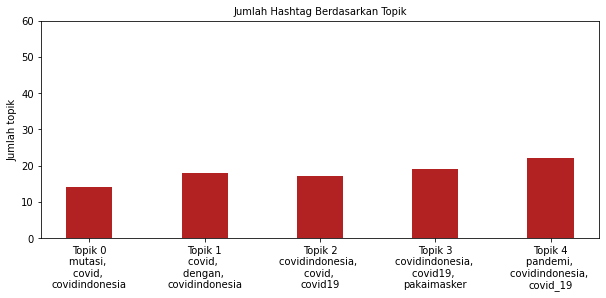

In [16]:
random_state = 0 

doc_set = """
Gubernur DKI Jakarta Anies Baswedan kembali menerapkan pelaksanaan Pembatasan Sosial Berskala Besar atau PSBB Jakarta. "Kita terpaksa kembali menerapkan Pembatasan Sosial Berskala Besar seperti pada masa awal pandemi dulu. Bukan lagi masa transisi, tapi PSBB awal dulu," ucap Anies (9/9).Pelaksanaan rem darurat, menurut Anies demi menyelamatkan masyarakat Jakarta karena tengah terjadi tren kenaikan kasus Covid-19 di Jakarta. Dia mengatakan saat ini ketersediaan tempat tidur isolasi sebanyak 4.800-an bisa penuh jika kondisi tidak berubah. "Kami sampaikan malam ini sebagai ancang-ancang, mulai Senin 14 September kegiatan perkantoran yang non-esensial diharuskan melaksanakan kegiatan bekerja dari rumah," kata Anies menjelaskan.Sementara itu, jumlah pasien positif Covid-19 di Jakarta bertambah 1.026 kasus pada Rabu 9 September 2020. Dengan penambahan tersebut jumlah akumulatif pasien positif Covid-19 sebanyak 49.837 orang.30w
Dikutip brilio.net dari liputan6.com, Pusat Pengelolaan Komplek Gelora Bung Karno (PPKGBK) mulai memperketat aturan bagi masyarakat yang ingin berkunjung ke kawasan tersebut, salah satunya dengan melarang ibu hamil dan anak-anak masuk kawasan kompleks GBK.Direktur Utama PPKGBK Winarto mengatakan, kebijakan tersebut diambil setelah pengelola menemukan masih banyak pengunjung, terutama di ring road SUGBK yang tidak melakukan protokol kesehatan. "Dalam pengamatan kami, yang datang ini tidak bermaksud olahraga, tapi piknik. Mereka banyak yang membawa anak, bayi, dan kereta dorong. Mungkin hanya sekitar 40 persen yang betul-betul berolahraga," kata Winarto (18/6). Keputusan melarang ibu hamil, bayi, dan anak-anak juga tak serta merta diambil begitu saja. Menurut Winarto, kebijakan tersebut merupakan rekomendasi dari Ikatan Dokter Anak Indonesia.Selain melarang ibu hamil dan anak-anak di bawah usia 12 tahun, pengelola juga telah menetapkan kebijakan baru agar masyarakat bisa tetap aman dan nyaman dengan kebijakan jam operasional dimulai pada pukul 05.00-20.00 WIB, akses masuk ke kawasan GBK melalui Pintu 5 dan Pintu 10, dan area Ring Road Stadion Utama GBK hanya untuk pejalan kaki.Jangan lupa cek terus ya di www.brilio.net untuk hal-hal menarik, unik, langka dan info terupdate lainnya.42w
Presiden AS Donald Trump mengatakan dia dan ibu negara Melania Trump dinyatakan positif Covid-19.Dalam sebuah unggahan di Twitter pada Jumat (2/10), ia menyampaikan informasi tersebut. â€œKami akan segera memulai proses karantina dan pemulihan kami. Kami akan melewati ini bersama!â€ tulis Trump.Sebelumnya, salah satu penasihat Presiden AS Donald Trump, Hope Hicks, dinyatakan positif terpapar Covid-19. Penasihat presiden itu sempat melakukan perjalanan bersama Trump dengan Air Force One ke debat presiden AS di Ohio pada Selasa kemarin.27w
Pemprov DKI Jakarta memutuskan mengurangi kebijakan rem darurat dan kembali menerapkan Pembatasan Sosial Berskala Besar (PSBB) Transisi, mulai 12-25 Oktober 2020. Dengan pelonggaran itu, maka beberapa aktivitas Indoor boleh kembali diperbolehkan beroperasi, salah satunya bioskop. "Dengan pengaturan tempat duduk secara ketat," kata Anies dalam keterangan tertulis, Minggu (11/10/2020).Aktivitas indoor yang dimaksud adalah bioskop, meeting, workshop, seminar, teater, akad nikah, pemberkatan, upacara pernikahan. Namun, kegiatan tersebut baru dapat dibuka saat PSBB Transisi dengan syarat harus melalui pengajuan persetujuan teknis oleh pengelola gedung kepada Pemprov DKI.Selain itu, terdapat enam syarat lainnya untuk dapat izin operasi saat PSBB Transisi, yakni:- Maksimal 25% kapasitas.- Jarak antar tempat duduk minimal 1,5 meter- Peserta dilarang berpindah-pindah tempat duduk, atau berlalu- lalang (melantai)- Alat makan-minum disterilisasi- Pelayanan makanan dilarang dalam bentuk prasmanan- Petugas memakai masker, face shield, dan sarung tangan.25w
Dilansir dari health.detik.com, saat seseorang terinfeksi virus Corona, berbagai gejala biasanya muncul seperti demam, batuk hingga diare. Bahkan sebagian lainnya ada juga yang tidak mengalami gejala apapun atau disebut dengan orang tanpa gejala (OTG).â£â£Namun dari beberapa gejala yang ada, kehilangan indra penciuman atau anosmia menjadi salah satu yang paling khas. Meskipun sering dialami saat seseorang flu, hal ini akan jauh lebih parah pada pasien COVID-19.â£â£Apa itu anosmia?â£â£Anosmia adalah kehilangan kemampuan indra penciuman yang biasanya dialami oleh seseorang yang sedang flu karena hidung tersumbat. Tetapi, belakangan kondisi ini sering sekali dialami para pasien COVID-19, diikuti dengan hilangnya kemampuan indra perasanya.â£â£Bagaimana kondisi itu bisa terjadi?â£â£Menurut penelitian, penyebab kehilangan penciuman ini bisa terjadi pada pasien COVID-19 karena adanya protein di permukaan beberapa sel manusia, yang bisa dengan mudah 'mengikat' virus Corona.â£â£"Ini adalah sel-sel yang ditemukan di jantung, paru-paru, usus, tenggorokan, dan hidung," tulis peneliti yang dikutip dari Science Focus, Senin (21/9/2020).â£â£Sampai kapan gejala itu akan terjadi?â£â£Berdasarkan studi lanjutan yang dilakukan, para ilmuwan pun mengamati pasien yang pulih dari COVID-19. Mereka menemukan bahwa neuron sensorik ini perlahan mulai kembali dari waktu ke waktu, tetapi efek jangka panjang gejala ini masih belum diketahui.â£â£"Beberapa pasien COVID-19 melaporkan setelah kemampuan indra penciuman mereka kembali, mereka mencium bau yang menyimpang (parosmia) dan bertahan selama berbulan-bulan," ujar Dr Lane.â£â£"Gangguan bau jangka panjang COVID-19 ini tidak biasa, sehingga perlu dilakukan studi lebih lanjut," imbuhnya.â£â£#mitrakorpora #mysafe #mysafeapp #beritaterkini #updatecovid19 #updatecovid #viral #updatecovid19indonesia #updatekorona #beritaindonesia #beritaviruscorona #covidindonesia #covidindo #beritacovid19 #viralindonesia #beritacovid #updatecovid #pakaimasker #beritaviral #beritaviralhariini #beritaviral_hits #covid19 #beritakorona #lawancovid19 #beritaterbaru #viralbanget22w
[MYOSIN WEBINAR SERIES PART 3]Yang ditunggu telah tiba!!â€¢Hoax? Bagaimana jadi pribadi yang lebih bijak terhadap info ya?Bingung cara membuat konten kreatif dan inovatif disaat krisis?â€¢Dengan bangga, Achilles mempersembahkan..â€¢MYOSIN WEBINAR SERIES PART 3â€¢ðŸ—“ï¸ Minggu, 13 September 2020ðŸ•› pukul 13.00-15.00 WIBðŸ“³ Live via zoom dan youtube di kanal Baksos FK UNAIR MYOSIN 2020ðŸŽŸï¸ FREE registðŸŽ E-SERTIFâ€¢Narasumber :â€¢ dr. Ricky Indra Alfarai (Health and Academic Influencer, PhD student in Japan)â€¢ Gita Savitri Devi, B. Sc ( Creators of Change Ambassador)Moderator:â€¢ Arya Satya Rajanegara, S. Ked (Founder Meniscus, Sekretaris Wilayah 4 ISMKI 2019/2020)MC:â€¢Alfira Nailatul Izzah (Duta Favorit FK Unair 2018)Jadi, jangan lewatkan kesempatan mendapatkan Ilmu!Segera daftarkan dirimu,dan ajak orang-orang terdekat mu!â€¢Di link>> bit.ly/WebinarMYOSIN2020Link di bioâ€¢" Sedikit kebaikan yang kita berikan, bisa sangat berarti bagi mereka yang membutuhkan"Myosin 2020â€¢#BaksosFKUNAIR #MYOSIN2020#FKUNAIR#MulaiBerbuat #Maribermanfaat #mulaiajadulu #Pejuangmanfaat#WEBINAR #webinargratis #webinarseries #webinarkesehatan #covid19 #covid_19 #covidindonesia #covidjatim #newnormal #newnormal2020 #kebiasaanbaru #kebiasaanbaru2020 #produktif #millenial #seminar_um29w
Dilansir dari pandemictalks, momen pengetukan palu akan RUU Cipta Kerja atau #omnibuslaw saat pandemi berlangsung telah memantik keramaian-keramaian demontrasi oleh beberapa buruh dan rakyat di beberapa daerah. Sebuah keputusan yang tidak tepat momentumnya, karena menimbulkan reaksi buruk bagi pandemi, yaituâ£â£â£â£1. Keramaian dalam jarak dekatâ£, kemungkinan ada beberapa orang tidak menggunakan masker.â£2. Durasi keramaian lamaâ£.â£3. Droplets/aerosol yang berterbaran saat orasiâ£. Orang berteriak mengeluarkan banyak Droplets.â£4. Dan paling bahaya adalah tiada TESTING dan TRACING saat/sesudah demonstrasi berlangsung.â£â£â£â£Karena dikhawatirkan akan muncul klaster besar demo, lalu bermigrasi ke klaster keluarga juga klaster kantor/pabrik. Super-Spreader event juga dikhawatirkan terjadi.â£â£Untuk itu, demi mencegah penyebaran virus korona saat demonstrasi tetap disiplin menerapkan protokol kesehatan ya safe people!â£â£â£Berikut ini adalah cara demostrasi yang aman dan sehat saat pandemiâ£â£1. Gunakan maskerâ£2. Gunakan pelindung mata/kacamata untuk mengurangi transmisi virus melalui mata.â£3. Jaga jarak minimum 2 meter dengan peserta demo lainnyaâ£4. Usahan jangan berada di posisi tengah barisan demonstrasi, namun di ujung luar garis deminstrasi. Selain itu, perhatikan arah angin untuk minimalisir penyebaran aerosol.â£â£â£#mitrakorpora #mysafe #mysafeapp #beritaterkini #updatecovid19 #updatecovid #viral #updatecovid19indonesia #updatekorona #beritaindonesia #beritaviruscorona #covidindonesia #covidindo #beritacovid19 #viralindonesia #beritacovid #updatecovid #pakaimasker #beritaviral #beritaviralhariini #beritaviral_hits #covid19 #beritakorona #lawancovid19 #beritaterbaru #viralbanget23w
Najwa mewawancarai kursi kosong?Acara mata najwa kini menjadi sorotan dikarenakan suatu momen ketika najwa mewawancari kursi yang tidak ada orang padahal memang sebelumnya dia mengundang mentri kesehatan namun tidak hadir dan dia tetap melajutkan acara dengan mewawancari kursi kosong wow. Menurut kalian gimana?...Credit tertera di video ðŸ˜ŠSource: Tiktok..Jangan lupa follow Vidteutic ya gaes ðŸ˜Š@vidteutic@vidteutic@vidteutic..#najwashihab #terawan #covid #covidindonesia27w
Ternyata Poto saya dari kecil sudah pakai maskerðŸ˜·ðŸ˜€ðŸ˜Ž.#protokolkesehatan#memakaimasker#covidindonesia#covid19indonesia30w
"Dunia ini ibarat bayangan,kalau kamu berusaha menangkapnya,ia akan lari.Tapi kalau kamu membelakanginya,ia tak punya pilihan selain mengikutimu."- Ibnu Qayyim Al Jauziyyah -#indonesiatangguh #indonesiasehatdarirumah #indonesiajuara #sehatnegeriku #semangat #semangatindonesia #semangatpagiðŸ’ª #katakatabijak #islamicquotes #nasehat #nasehatislam #covidindonesia #lawancovid19 #quotereligi #quotesoftheday #pesan #pesanibu #ingatpesanibu #moslemquotes25w
MYOSIN WEBINAR SERIES #3â€¢Telah terlaksana webinar terakhir dari MYOSIN Webinar Series dengan tema "Cerdas dan Kreatif dalam Bersosial Media di Era Milenial". Terima kasih kepada narasumber dan seluruh peserta. Semoga webinar yang diberikan dapat menginspirasi kita semua dan bermanfaat untuk mendukung aktivitas kita di era milenial ini.â€¢"Sedikit yang kita berikan, bisa sangat berarti bagi mereka yang membutuhkan" -Myosin 2020-#BaksosFKUNAIR #MYOSIN2020 #FKUNAIR #MulaiBerbuat #MariBermanfaat #mulaiajadulu #Pejuangmanfaat #WEBINAR #webinargratis #webinarseries #webinarkesehatan #covid19 #COVID-19 #covidindonesia #covidjatim #newnormal #newnormal_2020 #belajar #hoax #creative #content29w
Hey everyone, Christmas is coming! ðŸŽ„ðŸŽ…As you make your holiday plans, remember that the best gift ðŸŽðŸŽ‰ you can give is stay home and stay safe!Stronger than ever ðŸ’ªðŸ» Yes.. i was tested positive for #covid19 and believe me, itâ€™s only time that positive sounded so negative.Iâ€™m still recovery each day, trying to be stronger physically, mentally, and emotionally.Thanks to my lovely husband, entire family who stood by my side and all friends who supported in every possible way â¤ï¸â¤ï¸â¤ï¸ITâ€™S ONLY BY HIS GRACE, iâ€™m getting my energy back slowly. Thank you for all the love, pray, and support you guys have given me so far.Badai pasti berlalu~~~#covidsurvivor #covidindonesia16w
Ini kenyataan yang sulit diterima tapi juga tak bisa diabaikan#Covid #covidindonesia #covid_19 #Jepara #JeparaKita39w
Kulik santai minggu besok kita mengimport dokter Psikiatri yg beken yaitu @algristianhafid ! Kita akan bahas lebih dalam infodemics (jutaan infoo yang seliweran saat ini) benernya madu atau racun sih? Kita akan bahas kenapa informasi (bisa bener atau bohong) itu madu untuk raga kita atau ternyata racun! Syedappp..Jangan lupa minggu besok yaaa! Jam nya tetep dong jam 20.00#kuliksantai #livetalk #infodemic #infokesehatan #infosehat #psikiatri #instagramlivestream #dokterpedia #covidindonesia28w
produk gabungan antara buku dan boneka yang dikemas apik dengan penambahan fitur audio. Konsep buku boneka pertama di Indonesia yang cocok menemani aktivitas buah hati dimanapun berada.Hubungi Book Advisor kesayangan Ayah Bunda sekarang juga,hubungi Bunda Dea WA 085708850299 atau klik link di bio untuk info selengkapnya ya! ðŸ˜‰â£â£â£â£ðŸ˜ŠðŸ’•â£â£â£â£â£â£â£â€”#momliteracyexpo2020â£â£#mizanmle2020â£â£#mandiramle2020â£â£#mbcmle2020#mizanstore2020#gabungduluaja #bukuanakmataram #bukuanakjawa #covid19italia #covidindonesia #covid19 #motherhood29w
Selalu taati protokol kesehatan dan lakukan 3M yaitu Memakai Masker, Mencuci Tangan dan Menjaga Jarak. Lindungi selalu keluarga â¤#coviÌ‡d19 #covid19indonesia #covidlife #covidindonesia #cegahcovid19 #cegahcovid #cegahcovid19bersama #cegahcorona #cegahcoronabersama #mencucitanganpakaisabun #mencucitangan #menjagajarak #pakaimaskeryuk #pakaimaskerselalu #pakaimasker #pakaimaskerlebihaman #pakaimaskeruntuksemua #pakaimaskerutksemua #maskerkain #maskerterbaik #lindungikeluargaanda #lindungikeluarga #tipskeluarga #tipskeluargasehat #tipssehatalami #tipssehat #tipssehatkeluarga27w
Kasus covid-19 klaster keluarga sempat merebak nih beberapa waktu terakhir.. TemanKita, hindari penyebarannya dengan tips di atas ini yuk ðŸ‘†ðŸ»-Jangan lupa simpan dan bagikan ke teman-teman yang lainnya juga ya! Stay safe, TemanKita ðŸ¥°27w
Apa aja sih yg kalian lakuin dirumah selama pandemi? ðŸ¤”.Admin yg pasti ngegame dong wkwk, Semoga pandemi ini cepat berakhir. tag teman kamu..âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âœ”FOLLOW FOR MORE MEME & INFO:@infogamer.id@infogamer.id@infogamer.idâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–[BONUS TAG]#covidindonesia #gamerforlife#indogamers âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–37w
Cara menggunakan masker harus benar agar lebih efektif dalam pencegahan penyebaran virus ðŸ¦ .#idntimes #covid_19 #corona #protokolkesehatan #protokolkesehatancovid19 #coronaindonesia #coronajakarta #covidindonesia26w
My normal Sunday.. What about yours?#dokteranakmedan #rsiastellamaris#rsiastellamarismedan #dokteranak #pediatrician #siagacovid19 #covid19 #covid19indonesia #covidindonesia #stopcovid19 #pandemic2020 #proimunisasi #imunisasi #indonesiasehat #anakindonesia #balitasehat #bayisehat #bayisehatindonesia #anakmedan #newnormal #newnormalindonesia #newnormalmedan #bersamalawancorona #newnormal202039w
Vaksinasi termasuk dalam imunisasi khusus yang dimuat dalam Peraturan Menteri Kesehatan Nomor 12 Tahun 2017 tentang Penyelenggaraan Imunisasi, Vaksinasi dilakukan dengan tujuan untuk tercapainya herd immunity atau kekebalan masyarakat di suatu negara terhadap suatu penyakit tertentu.Jika hal itu tidak tercapai, maka dikuatirkan jumlah korban meninggal terus akan bertambah, pemulihan kesehatan masyarakat akan memakan waktu lebih lama dan tentu biaya yg dikeluarkan pun akan semakin besar. Kita semua pastinya berharap strategi yg diterapkan @kemenkes_ri @satgascovid19.id utk menyelenggarakan vaksinasi bisa direncanakan secara matang dan baik agar tercapai target tujuannya.Jadi gimana menurut boss2kuh Layakkah bila rakyat hrs bayar utk mendapatkan vaksin ini?Silakan tulis jawaban dan alasanmu di kolom komen ya :)Thanks..ðŸ™ðŸ»Tetap jaga protokol kesehatan danStay safe and healthy semua ya ðŸ˜Š ðŸ™ðŸ½#vaksincovid19 #herdimmunity #vaccinecovid19 #sinovac #pandemicovid19 #vaksin#indonesialawancorona #antibodi #covid19indonesia #vaksincorona#mentrikesehatan #indonesiabangkit #protokolkesehatan #cucitangan #stopcovid19 #menkes #faktakesehatan #covidindonesia #updatecovid19 #beritacorona #indonesialawancovid19 #coronamasihada16w
Good Morning Ayah Bunda ðŸ¤—ðŸ˜ â£â£Salah satu board book dalam Healthy Kids berjudul Achoo terdapat fitur slide dan push pull nya yang bisa dimainkan si kecil lho ðŸ¤©ðŸ¤©â£â£Semuanya dirancang untuk melatih kemampuan motorik halus anak dari pergelangan tangan hingga jari-jarinya. ðŸ¥°ðŸ˜â£â£Hubungi Book Advisor Bunda DeaWA 085707850299 sekarang juga untuk info selengkapnya ya ðŸ˜‰â£â£#BeHealthyWithHealthyKids #HealthyKids #AnakSehat #LalaRaka #BentangKids #Bentangpustaka #GabungAjaDulu #ResellerMandira #mandiradiansemesta #boardbook #boardgame #covid19 #coronavirus #covidindonesia #hidupsehat #hidupbersih #bukuanakmontessori #bukuanakbestseller #BukuBalita #bukubalitabestseller27w
Bismillah semoga menjadi jalan ikhtiar, kami SIAP....ðŸ˜‰ðŸ˜ŠSemoga covid cepat berlalu..#covid_19 #covidindonesia #covidfree12w
Selalu ingin si kecil menjaga kebersihan ðŸ¥°Mencuci tangan yang baik dan benar merupakan hal esensial yang wajib diajarkan oleh para orang tua kepada anak-anaknya.Mengingat, sebagian besar kegiatan yang kita lakukan sehari-hari hampir semuanya melibatkan tangan.Temukan hanya di Healthy Kids ðŸ¥°Segera hubungi Book Advisor Bunda Dea WA 085707850299 untuk info selengkapnya ya ðŸ˜‰#BeHealthyWithHealthyKids #HealthyKids #AnakSehat #LalaRaka #BentangKids #Bentangpustaka #GabungAjaDulu #ResellerMandira #mandiradiansemesta #boardbook #boardgame #HealthyKidsMandira #covidindonesia #bukudongeng #bukubalitajombang #bukuanakmataram #bukuanaklombok #bukuanakbandung #bukuanakbekasi #BelajarMengaji27w
Koran Tempo edisi tanggal 31 Agustus 2020 lalu menulis liburan panjang menjadi salah satu pemicu lonjakan kasus Covid-19.DKI Jakarta berkontribusi paling banyak menyumbang pasien positif Covid-19. Tim Gugus Covid-19 DKI Jakarta mencatat ada lonjakan jumlah kasus sebanyak 1.114 pada 30 Agustus 2020.Kepala Bidang Pencegahan dan Pengendalian Penyakit Dinas Kesehatan DKI, Dwi Oktavia, mengatakan lonjakan jumlah kasus dalam sepekan terakhir dipengaruhi oleh efek libur panjang pada rentang 16-22 Agustus 2020. â€œSebagian besar terpapar saat libur panjang akhir pekan,â€ kata Dwi.#datatempo#tempodotco#majalahtempo#korantempo#tempopublishing#covidindonesia #covid19#covid19indonesia #jakarta#aniesbaswedan #psbb29w
ðŸ‡®ðŸ‡© Dirgahayu RI ke 75 ðŸ‡®ðŸ‡©Indonesia MajuMerdeka#dirgahayuindonesia#dokteranakmedan #rsiastellamaris#rsiastellamarismedan #dokteranak #pediatrician #siagacovid19 #covid19 #covid19indonesia #covidindonesia #stopcovid19 #pandemic2020 #proimunisasi #imunisasi #indonesiasehat #anakindonesia #balitasehat #bayisehat #bayisehatindonesia #anakmedan #newnormal #newnormalindonesia #newnormalmedan #bersamalawancorona #newnormal2020 #medan33w
Dengan harga 180.000, kamu bisa tebus alat ini untuk memperbaiki tulang punggung yang mulai membungkuk karena :â˜˜ï¸ Usiaâ˜˜ï¸ Cedera olahragaâ˜˜ï¸ Kebiasaan duduk yang burukâ˜˜ï¸ Penyakit dan lain-lainKelebihan dibanding produk lain :â˜˜ï¸Desain nyamanâ˜˜ï¸Strap bisa disesuaikan kencang kendor sesuai dengan keinginan andaâ˜˜ï¸Tidak akan membuat anda kesakitan/sesakâ˜˜ï¸Bahan nyaman tidak bikin iritasi atau gatal seperti merek lainCara pakai :Sesuaikan strap dengan ukuran anda, senyaman anda, pakailah 15-30 menit sehari sesuai kebutuhan anda..ðŸ“ŒORDER BY WA 085286799191ðŸ“ŒPayment BCA/BRIðŸ“ŒSHIPPING JNE/J&TðŸ“ŒMAX ORDER JAM 2 SIANG UNTUK DIKIRIM DIHARI YANG SAMA.Note : Ada ribuan foto yang beredar didunia maya, namun setiap penjual memiliki kualitas barang yang berbeda, so jangan tertipu. Hanya kami yang menjamin kualitas terbaik ðŸ˜‰----------------------------------------------------------------Pastikan beli ditoko kami, THE BEST QUALITY ðŸ‘‡Follow â€” Follow â€” Follow@atalifshop.penegakbadan@atalifshop.penegakbadan@atalifshop.penegakbadan ----------------------------------------------------------------#indonesia #jakarta #like #bali #pulauweh #viralbanget #dirumahaja #surabaya #covidindonesia #kulinerbandung #bandungphotography #follow #medan #repost #love #travel #jawabarat #jawatimur #likes #jogja #pesonaindonesia #islam #semarang #fashionindonesia #pondokgede #bintaro #bsdcity #pandemic25w
Teman2 silahkan LIke video kami di Youtube yah! Caranya silahkan klik di Link Bio saya dan Klik Youtubenya, trus di LIKE deh! Thanks yah semua!!! #gkiperniagaan #gkipernias #bulankeluarga #covid_19 #covid #covidindonesia24w
Inilah sebagian kisah kami di masa sulit ini.. Sudah lebih dari 100 dokter yang gugur.. This is our story..(Full story nya ada di Youtube channelnya dokter keceh @clahayes https://youtu.be/trDi7YFdc2U )Makasih utk kesempatannya Doc Clarin! ðŸ™ŒðŸ»ðŸ¤ŸðŸ»â€œLekas pulih Indonesiaku ðŸ‡®ðŸ‡©ðŸ‡®ðŸ‡©â€Btw ini video uda di review dan disetujui oleh European Union dan UNDP (United Nation Development Programme).. ðŸ¤—â˜ºï¸#covid19 #covid_19 #covidindonesia #dokterkandungan #badaipastiberlalu #jagadirisemangatbelajar #akulawancovid19 #UreportCOVID19 #bersatulawancovid30w
JANGAN ORDER DARI MELODIA!Kita semua harus bersatu untuk bangkit dari pandemi ini ya melodiacs! Saling mendukung dan merangkul satu sama lain di masa pandemi ini agar semuanya bisa kembali berdiri lebih kokoh dari sebelumnya!#melodiamusik #hanyadimelodia #covid19 #covidindonesia22w
Active cases in different parts of the world as of 08.04.21Source: https://www.worldometers.info/coronavirus/Illustration: rawpixel.com#corona #coronaindonesia #covid_19 #covid #coronaviruspandemic #news #coronanews #covidnews #covidupdates #coronaupdate #covidupdate #pandemic #covidindonesia #school #schoolproject4h
Governo do Estado confirma volta do PaulistÃ£o, datas serÃ£o divulgadas nesta sexta-feira@palmeiras @fpf_oficial #palmeirasantifascista #futebolÃ©vida #futeboldevÃ¡rzea #palmeirasminhavidaevocÃª #palmeirasgigante #coviÌ‡d19 #futebol2019 #futebolâš½ #palmeirasðŸ’š #covidindonesia #palmeirasminhavida #palmeirastour #covid_19ðŸ˜· #palmeirasonline #avantipalmeiras #sociedadeesportivapalmeiras #familiapalmeiras #futebolbrasileiro #palmeirasminhavidaÃ©vocÃª #sepalmeiras #futebolnaveia #futebolaovivo #meupalmeiras #futebolpaulista #futebolprofissional #soupalmeiras #palmeirascampeao #covidbrasil #palmeiraskids #tvpalmeiras5h
Halo MySafriends! Sudah tau keunggulan aplikasi MySafe dibanding aplikasi kesehatan lain, belum?Nih, Mimin kasih sedikit bocorannya! Kalau mau liat yang lebih lengkap, tunggu kehadiran MySafe Apps segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu6h
Insta Live dg @cofight_id: Mutasi Corona, Apa Bahayanya? [Bagian ke-2]dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#vaksÃ¬nasicovid19#rapidtestcovid19#vaksin#vaksÃ¬ncovid19#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat6h
Supplier Jahe Merah Segar ðŸƒStock Selalu Ready âˆšPetani Jahe Merah Pemula ðŸ”°@morajayatani_rempah#jahe#jahemerah#bertani#jahe#jualjahemerah#petani#indonesia#rempah#jamu#bisnisdigital#vaksin#covidindonesia#organik#petaniindonesia#budidaya#jamu#benih#bibit#simalungun#medan#pasarinduk#organik#cargo#bisnissampingan#pabrik#kebun#petaniindonesia#makassar#marketplace#diskonakhirtahun7h
Update COVID-19 Global dan Indonesia, Jumat (9 April 2021).#updatecoronaindonesia #updatecorona #updatecovid19 #covidindonesia #corona #covid19indonesia #Infoindonesia8h
Nabi PalsuDari Anas bin Malik ra, Nabi Muhammad bersabda, "Firdaus adalah surga yang paling tinggi, yang paling bagus, dan yang paling afdal (utama)." (HR. Turmudzi dan disahihkan oleh Al-Albani).Rasulullah Shallallahu â€˜alaihi wa sallam bersabda,â€Aku mendatangi pintu surga pada hari kiamat. Lalu aku minta dibukakan. Maka penjaga pintu Surga berkata, â€˜Siapakah engkau?â€™ Lalu aku jawab,â€™Aku Muhammadâ€™. Lantas malaikat tersebut berkata,â€™Aku diperintahkan dengan sebab engkau. Aku tidak membukanya untuk seorangpun sebelum engkauâ€™.â€ (HR Muslim).Tag orang terdekatmu, biar tauðŸ‘‡Bantu dakwah ðŸ‘‡&lihat vidio lainnyaShare & follow @laskarciptahatiSumber YT HIJRAH TOTAL#prayforkalsel #banjarbaru #banjarmasin #banjirkalsel #covidindonesia #bukuislami #ilmuagama #dirumahsaja #videoislam #infobanjar #motivasionline #habarbanua #kalamberhijrah #sholawatbanjari #islamicquotes #wowfaktavidio #wargabanua #selfreminder #hijrahsantun #beranihijrah #syekhalijaber #hijrahquote #faktanyamuslim #banjarinfo #notemuslimah #duniabersholawat #klikbanjar #laskarciptahati9h
#vaksincoronavirus #vaksin #sinovac #pfizer #moderna#covax #vaksinvirus #vaksincovidl 9 #dukungvaksinasicovid#dukungvaksincovidl 9 #covidindonesia #covid #viruscorona#coronavirus #coronaindonesia #covidl 9 #like41ikes#likeforlikes #likesforlike #likes #like #likeme #liketime#likesforlikesback #likeforfollowers #likeforlikealways#likeforfolback11h
Vaksin astrazeneca aman dan Halal#vaksincoronavirus #vaksin #sinovac #pfizer #moderna#covax #vaksinvirus #vaksincovidl 9 #dukungvaksinasicovid#dukungvaksincovidl 9 #covidindonesia #covid #viruscorona#coronavirus #coronaindonesia #covidl 9 #like41ikes#likeforlikes #likesforlike #likes #like #likeme #liketime#likesforlikesback #likeforfollowers #likeforlikealways#likeforfolback11h
Informasi dari Kumparan, Ikut uji coba 3 siswa peserta sekolah tatap muka terpapar covid di bogor.#lindungidiri #dokterindonesia #apbaperangicovid #coronaindonesia #gardaterdepancovid19 #corona #covid #hazmatsuit #maskern95 #maskerkn95 #bersamaperangicorona #lawancorona #covid19 #covidsurvival #kitabisa#apd #covidindonesia #newnormal #kebiasaanbaru #faceshield #eswl #ginjal #batuginjal #laundryhospital12h
Secara sosial kita harus saling mendukung dan menguatkan. Yang kuat bantu yang lemah. Yang berpunya, sisihkan sebagian hartanya untuk yang papa. Sisihkan juga untuk penyediaan APD dan perangkat pendukung kesehatan lainnya terutama untuk tenaga kesehatan dan tenaga pendukung lainnya.Perjuangan belumlah berakhir.Mari bersama-sama melawan covid-19.KTA IBI : 3516.1900.0043#persembahanuntuknakes#rsisakinah@__rizkiamalia__@nuniklusiandi1575@lidamawlidah@hariyati_anik@permatasari_pipit@echa.ajah.790@hertaariani@laila_agustin_d@aniklitamustika@beby.r.ayu@febrinaac@fitri_nur_awaliyah@vista_yusnia@arinovita310@khoirotunnastiti38285@lina_pramukti#covid_19 #covid19indonesia #covÄ±d19 #covid #covidindonesia13h
Halo, friends! Sudah tau keunggulan layanan kesehatan apa saja yang disediakan MTF Lab, belum?Nih, Mimin kasih sedikit bocorannya! Kalau mau liat yang lebih lengkap, coba deh kunjungi website mitrakorpora.id dan tunggu kehadiran aplikasi MySafe segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona13h
Update data covid19 Sulawesi Barat tanggal 08 April 2021-Positif : 3Mateng :3Sembuh :29Mamuju :29Meninggal : 0Total sulbar :Positif : 5378Sembuh : 5205Meninggal : 114--#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi1d
Hai, friends! Tahukah kamu, terdapat hal-hal yang perlu diperhatikan sebelum melakukan vaksinasi Covid-19 lho!Nah, slide kiri postingan di atas untuk tau lebih banyak tipsnya!Mau lebih banyak informasi kesehatan terkini? Mulai dari layanan kesehatan, vaksinasi, tes swab, dan lainnya? Kunjungi website mitrakorpora.id dan tunggu kehadiran aplikasi MySafe segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu1d
Pada hari selasa (6/4), tim Gardamedica melakukan proses instalasi kapsul transpor pasien infeksius bertekanan negatif, Garda Isolation Patient Capsule di RSUP Persahabatan.Pemasangan alat juga dibarengi dengan edukasi kepada para tenaga kesehatan Rumah Sakit mengenai kegunaan serta cara pemakaian dari kapsul transpor pasien tersebut.â€¢â€¢#pasien #covidupdate #covidindonesia #covid #covidinfo #covid19 #dokter #rumahsakit #negativepressure #chamber #isolationchamber1d
Pandemi covid-19 membuat kita tidak bisa melakukan aktifitas biasanya dan lebih sering berdiam dirumah. Hal ini membuat banyak masalah baru seperti stress, depresi dan kejenuhan maksimal terutama bagi anak-anak muda. ðŸ˜•Sehingga kita perlu mengatur diri kita dengan sangat baik untuk mengindari masalah psikologi. ðŸŽ­Stay safe, Stay Healthy!#igouni #covid_19 #info #informasi #pandemi #tips #quotepsikologi #depresi #stress #covidindonesia #pandemicovid19 #jagakesehatan #kesehatan1d
Hai, MySafriends! Sudah setahun lebih ya kita harus bertahan di situasi pandemi. Kondisi ini juga memaksa kita di rumah saja, tapi juga harus tetap menjaga kondisi tubuh agar terus bugar dan sehat.Nah, kali ini ada tips-tips buat kita semua agar tetap sehat dan bugar, meski #dirumahaja! Slide kiri postingan di atas untuk tau lebih banyak tipsnya!Mau lebih banyak informasi kesehatan terkini? Mulai dari layanan kesehatan, vaksinasi, tes swab, dan lainnya? Tunggu kehadiran MySafe Apps segera di Google Play Store & App Store!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu1d
Sobat Anytime udah denger belum kalau banyak beredar masker palsu?â£â£Bersumber dari kemkes.go.id, bahwa masker asli yang layak beredar adalah yang telah memenuhi persyaratan mutu keamanan dan manfaat, antara lain telah lulus uji Bacterial Filtration Efficiency (BFE), Partie Filtration Efficiency (PFE), dan Breathing Resistence sebagai syarat mencegah penularan bakteri dan virus minimal 95%. â£â£#pakaimasker #maskerpalsu #protokolkesehatan #promosikesehatan #kemenkes #tipscovid #cegahcovid #infocovid #infocovid19 #covidindonesia1d
Supplier Jahe Merah Segar ðŸƒStock Selalu Ready âˆšPetani Jahe Merah Pemula ðŸ”°@morajayatani_rempah#jahe#jahemerah#bertani#jahe#jualjahemerah#petani#indonesia#rempah#jamu#bisnisdigital#vaksin#covidindonesia#organik#petaniindonesia#budidaya#jamu#benih#bibit#simalungun#medan#pasarinduk#organik#cargo#bisnissampingan#pabrik#kebun#petaniindonesia#makassar#marketplace#diskonakhirtahun1d
#proteksi#dirimu#dengan#Sequis#sequislife#covid_19#coviÌ‡d19#covid19indonesia#covidindonesia#YourBetterTomorrow#plantheunplanned1d
Berbagi cerita itu selalu menyenangkan! Terimakasih untuk @friendsforlife_id sudah berkunjung bersama cerita super!ðŸ¤ðŸ¤ðŸ¤ #ceritasuper #donasicovid19 #donasicorona #galangdanacovid19 #donasijakarta #donasibandung #donasipurwakarta #palembang #jakarta #bandung #purwakarta #coronaindonesia #covidindonesia #covid19indonesia1d
Kunjungan cerita super ke Panti Asuhan Tirta Kadesy Palembang, seru bangetâœ¨âœ¨ #ceritasuper #donasicovid19 #donasicorona #galangdanacovid19 #donasijakarta #donasibandung #donasipurwakarta #palembang #jakarta #bandung #purwakarta #coronaindonesia #covidindonesia #covid19indonesia1d
Mutasi virus dari Sars cov 2. Varian E484K alias EEk di Indonesia. harap waspada dan berhati hati.#lindungidiri #dokterindonesia #apbaperangicovid #coronaindonesia #gardaterdepancovid19 #corona #covid #hazmatsuit #maskern95 #maskerkn95 #bersamaperangicorona #lawancorona #covid19 #covidsurvival #kitabisa#apd #covidindonesia #newnormal #kebiasaanbaru #faceshield #eswl #ginjal #batuginjal #laundryhospital1d
5 Rahasia Hemat Di Musim Pandemi Tapi Tetap Bisa Punya Mobil Baru5 Rahasia hemat dimusim pandemi, tapi tetap bisa punya mobil baru @toyotaauto2000singarajaâ£â£1. Manfaatkan Program Pajak Nol Persen dari pemerintah yg masih berlaku dibulan ini (yang lagi laris Rush dan Yaris)â£â£â£â£2. Manfaatkan Program Hari-hari spesial seperti: hari raya, hari nasional, dll (nah pas mau galungan dan kuningan)â£â£â£â£3. Manfaatkan Promo yang berlaku sekarang (tunjukkan gambar ini)â£â£â£â£4. Hubungi nomor yg tercantum digambar ya, hubungai Anggi di nomor ðŸŽðŸ–ðŸðŸ‘ðŸ’ðŸŽðŸ–ðŸ“ðŸðŸŽðŸŽðŸŽâ£â£â£â£5. Jangan ditunda, tanya dan konsultasi sekarang sebelum antrian panjang#toyotaauto2000singaraja #toyotaauto2000 #toyotabali #mobilbali #rentalmobilbali #rentcarbali #jasasewamobil #sewamobilbali #jasasewabali #jasasewamobilbali #musimpandemi #covid19bali #covid19indonesia #covidindonesia #like4likes #lflðŸ’› #lflðŸ’™ #followme #diskonbali #promobali #promogalungan2021 #promogalungankuningan1d
MUTASI COVID-19#Repost @dr.fajriaddaiâ€¢ â€¢ â€¢ â€¢ â€¢ â€¢Apakah yang dimaksud dg mutasi E484K?Apakah bedanya dg varian?Apakah dampaknya bagi pandemi ini?Apakah akan menyebabkan penularan lebih cepat?Bgmn efikasi vaksin?Bgmn Kita harus bersikap dg kondisi pandemi saat ini?Terutama perihal mutasi ini?dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#vaksÃ¬nasicovid19#rapidtestcovid19#vaksin#vaksÃ¬ncovid19#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat2d
Tired of #coronavirus yet? Want to know how tropical forests are a part of the solution and how and indigenous peoples can help avoid new pandemics? Read on. Today is #WorldHealthDay, after all.Overconsumption of nature causes diseases. Diseases transferred from animals to humans are called zoonoses. They're nothing new, but their rapid occurrence and spread across the world is unprecedented. With the rapid destruction of nature globally, they are spreading much faster than before. According to the UN Environment Programme (UNEP), 75 percent of all new infectious diseases in humans originate in animals. The increase in zoonoses is linked to the loss of nature and biodiversity, illegal hunting and trade in wild animals, and the destruction of their habitats. A new deal for nature is needed.@RainforestNorway 's policy advisor Silvana Bustillo Restrepo thinks we should view tropical forest conservation as protection against climate change as well as a health measure. "Most of the remaining intact forests today are where Indigenous Peoples live.Research finds these are also the most biodiverse, species-rich areas of the planet. At the same time, the guardians of these important ecosystems face increasing threats and lack good health services. Ensuring the health and rights of Indigenous Peoples is key for our well-being and the planet's. Let's leave no one behind!"All photos: AraquÃ©m AlcÃ¢ntara @araquemoficial#onehealth #LeaveNoOneBehind #NewDealForNature #indigenousrights #environmentalsustainability #fornature #environmentalprotection #protecttheplanet #rainforests #sgbiodiversity #savetherainforest #indigenouslivesmatter #indigenouspeoples #guardiansoftheforest #thereisnoplanetb #reforestation #respectnature #indigenouspeople #protectnature #climateaction #environmental #natureinfocus #biodiversitÃ© #protectourplanet #deforestation #saveenvironment #covid19brasil #covidindonesia2d
Bismillah..._Telah dibuka pembelajaran materi kebugaran online khususnya untuk bodyweight exercise dan calisthenic selama kurang lebih 2 bulan kedepan._Materi pembelajaran antara lain :1. Materi dasar yang singkat2. Pendalaman materi3. Tips dan saran4. Video pendek_Untuk lebih jelasnya silahkan DM,Terima kasih._#fitnessindonesia #fitnessindo #belajaronline #olahraga #olahragadirumah #covidindonesia2d
Update data covid19 Sulawesi Barat tanggal 07 April 2021-Positif : 1Majene :1Sembuh :29Polman :4Mamuju :25Meninggal : 0Total sulbar :Positif : 5375Sembuh : 5176Meninggal : 114--#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi2d
Sering merasa engap atau susah bernapas kalo olahraga pake masker ga sih Sobat Ourena?Niatnya mau tetap mematuhi protokol kesehatan, tapi kok malah bikin olahraga jadi ga maksimal. Biasanya bisa lari kuat 5K, karena pake masker baru lari 1K aja udah ngos-ngosan.Rena punya jawaban untuk permasaahan kamu! Coba deh beberapa masker rekomendasi Rena berikut. Masker yang di design untuk menunjang aktivitas olahraga kamu loh!Masker mana nih yang jadi favorit Sobat Ourena?#ourenasport #masker #maskerolahraga #stayhoops #brodo #specs #maskerlari #covid_19 #covidindonesia #corona #coronaindonesia #mask #maskerkain #maskerkainjakarta3d
Ingat pesan ibu jangn lupa pake maskerðŸ¤­...Thats all#á´„á´á´ Éªá´…á´‡Ê€á´€#covidindonesia#uinmataramkece18w
.BACA DESKRIPSI ðŸ‘‡____________________________________Santuy terus nanti gak naik kelas nangisKalian pernah merasa harus cuci tangan atau pakai hand sanitizer terus setelah menyentuh sesuatu, trus kulit kalian malah kering. Makanya beli Corona finger di @teheto_store.idSumber : terteraHastag :#pjj #sekolahonline #covidlife #covidmemes #covidvacccine #coviÌ‡d_19 #staysafeandhealthy #staysafeathome #staysafeoutthere #covidindonesia #memepjj #memespongebobsquarepants #memespongebobindonesia3d
bangga menjadi salah satu bagian dari acara @puterimodelmuslimah.babel @ssrumahpelangi.lets advanture with one of greatest indonesian cuisine...dengan bumbu dan masakan khas lombok membuat @saterembige_pgk berbeda dari yang lainnya ðŸ˜˜daging khas dalam tanpa lemak dibalur bumbu rempah pilihan sehingga rasa pedas manisnya autentik seperti daerah asalnya...ðŸ¥°..thanks buat @morinoktavia.......#pangkalpinang #satepangkalpinang #kulinerpangkalpinang #jajanpangkalpinang #erzaldirosman #bangkabelitung #bangka #pangkalpinanghits #pangkalpinanghitskekinian #pangkalpinanghitsbangka #pangkalpinangkekinian #pangkalpinangfood #pangkalpinangterkini #pangkalpinangcafe #kulinerpgk #kulinerbangka #kulinerpangkalpinang #monicahaprinda #pantaibangka #covid_19 #covidindonesia3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
Update data covid19 Sulawesi Barat tanggal 06 April 2021Positif : 1Polman :1Sembuh :11Mateng :2Pasangkayu :3Majene :6Meninggal : 1Polman :1Total sulbar :Positif : 5374Sembuh : 5147Meninggal : 114#surveilansdinkessulbar#covid_19#covid#covidindonesia#vaksÃ¬ncovid19#dinkessulbar#sulbarsehat#sulbarmarasa#sulbarmajumalaqbi3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3d1 likeReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3d1 likeReply
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Kami hadir untuk Anda dengan wajah baru yang lebih istimewa!#mitrakorpora #mysafe #mysafeapp #beritaviruscorona #covidindonesia #covidindo #updatecovid #beritaviral #beritaviralindonesia #beritaviralhariini #dirumahaja #jagajakarta #covidjakarta #jakartatanggapcorona #hadapibersama #jagajarakaman #jagajarakdulu #pakaimasker #aplikasicovid19 #aplikasicovid #covid19 #covid19indonesia #beritacovid19 #beritacovid #beritakorona #lawancovid19 #pesanibu3d
Update COVID-19 Global dan Indonesia, Selasa (6 April 2021).#updatecoronaindonesia #updatecorona #updatecovid19 #covidindonesia #corona #covid19indonesia #Infoindonesia3d
#beritaterkini #berita #beritaviral #beritaterbaru #covid_19 #covid19indonesia #covidindonesia #kabar #pandemi #viruscoronavirus #merdeka #infojakarta #infokesehatan #beritaindonesia #beritanasional #faktaindo #faktaunik #faktadanmitos #indonesia #indonesiaku #indonesiasehat #sehat #sehatalami #sehatnegeriku #indonesiabebascovid #indonesiabebascovid19 #vaksÃ¬ncovid19 #vaksÃ¬nasicovid19 #vaksÃ¬nsinovac #vaksin3dReply
PERTAMA DI INDONESIA SARUNG ANTIVIRUS DAN BAKTERI .....GD VIROBANGD VIROBAN adalah sarung yang mengandung N9 XTS - 18 yang dapat menghilangkan virus dan bakteri, selain nyaman dipakai, aman dari virus dan bakteri.Informasi lebih lengkap cek @gajahduduk_id#sarungindonesia #gdviroban #antivirus #covidindonesia#antibakteri #covid_19 #sarunggajahduduk #sarungantivirus #localpridesolutions3d
Recorded Insta Live dg @cofight_id: Mutasi Virus Corona, Apa Bahayanya?Akhir-akhir ini sedang menjadi 'hot issue' mutasi covid ini.Saya mencoba membahasakan dg bahasa yg mudah dimengerti karena topik ini memang agak rumit untuk dipahami.Rekaman berikut membahas:Apa itu mutasi?Apa itu gen, DNA, RNA ?Mengapa bisa terjadi mutasi?Apa dampak dari mutasi tersebut?Apakah varian baru masih dapat terlacak dg PCR?Bgmn cara membedakan varian dari COVID?dr. Muhamad Fajri Adda'i*monggo jika ingin share/repost ðŸ™#covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#pakemasker#indonesiakuat#melawancorona#covid2020#rapidtestcorona#rapidtest#rapidtestkit#rapidtestcovid19#rapidtestcovid#rapidtes#alatmedis#mencegahcorona#coronaindonesia#cegahcorona#lawancorona#cucitangan#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat3d






""".split("\n")[1:-1]


stopword = ['yang','dan','dari','ini','vaksÃ','lalu','mysafe','jahe','vaksa','the','and','vaksã','anak','untuk','aku','lebih','are','harus']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Hashtag Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah topik')
ax1.set_ylim(0, 60)


plt.show()